I. Requirement

In [499]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import time
import numpy as np
sns.set_theme(style="whitegrid", palette=[ "#023E8A" ]) 

import folium
from folium.plugins import HeatMap

In [3]:
accidents_df = pd.read_csv("accident.csv")
vehicles_df = pd.read_csv("vehicle.csv")
person_df = pd.read_csv("person.csv")
location_df = pd.read_csv("accident_location.csv")
node_df = pd.read_csv("node.csv")

II. Data Exploration

In [4]:
accidents_df.columns

Index(['ACCIDENT_NO', 'ACCIDENT_DATE', 'ACCIDENT_TIME', 'ACCIDENT_TYPE',
       'ACCIDENT_TYPE_DESC', 'DAY_OF_WEEK', 'DAY_WEEK_DESC', 'DCA_CODE',
       'DCA_DESC', 'LIGHT_CONDITION', 'NODE_ID', 'NO_OF_VEHICLES',
       'NO_PERSONS_KILLED', 'NO_PERSONS_INJ_2', 'NO_PERSONS_INJ_3',
       'NO_PERSONS_NOT_INJ', 'NO_PERSONS', 'POLICE_ATTEND', 'ROAD_GEOMETRY',
       'ROAD_GEOMETRY_DESC', 'SEVERITY', 'SPEED_ZONE', 'RMA'],
      dtype='object')

In [5]:
vehicles_df.columns

Index(['ACCIDENT_NO', 'VEHICLE_ID', 'VEHICLE_YEAR_MANUF', 'VEHICLE_DCA_CODE',
       'INITIAL_DIRECTION', 'ROAD_SURFACE_TYPE', 'ROAD_SURFACE_TYPE_DESC',
       'REG_STATE', 'VEHICLE_BODY_STYLE', 'VEHICLE_MAKE', 'VEHICLE_MODEL',
       'VEHICLE_POWER', 'VEHICLE_TYPE', 'VEHICLE_TYPE_DESC', 'VEHICLE_WEIGHT',
       'CONSTRUCTION_TYPE', 'FUEL_TYPE', 'NO_OF_WHEELS', 'NO_OF_CYLINDERS',
       'SEATING_CAPACITY', 'TARE_WEIGHT', 'TOTAL_NO_OCCUPANTS',
       'CARRY_CAPACITY', 'CUBIC_CAPACITY', 'FINAL_DIRECTION', 'DRIVER_INTENT',
       'VEHICLE_MOVEMENT', 'TRAILER_TYPE', 'VEHICLE_COLOUR_1',
       'VEHICLE_COLOUR_2', 'CAUGHT_FIRE', 'INITIAL_IMPACT', 'LAMPS',
       'LEVEL_OF_DAMAGE', 'TOWED_AWAY_FLAG', 'TRAFFIC_CONTROL',
       'TRAFFIC_CONTROL_DESC'],
      dtype='object')

In [6]:
person_df.columns

Index(['ACCIDENT_NO', 'PERSON_ID', 'VEHICLE_ID', 'SEX', 'AGE_GROUP',
       'INJ_LEVEL', 'INJ_LEVEL_DESC', 'SEATING_POSITION', 'HELMET_BELT_WORN',
       'ROAD_USER_TYPE', 'ROAD_USER_TYPE_DESC', 'LICENCE_STATE',
       'TAKEN_HOSPITAL', 'EJECTED_CODE'],
      dtype='object')

In [9]:
location_df.columns

Index(['ACCIDENT_NO', 'NODE_ID', 'ROAD_ROUTE_1', 'ROAD_NAME', 'ROAD_TYPE',
       'ROAD_NAME_INT', 'ROAD_TYPE_INT', 'DISTANCE_LOCATION',
       'DIRECTION_LOCATION'],
      dtype='object')

In [8]:
node_df.columns

Index(['_id', 'ACCIDENT_NO', 'NODE_ID', 'NODE_TYPE', 'AMG_X', 'AMG_Y',
       'LGA_NAME', 'LGA NAME ALL', 'DEG_URBAN_NAME', 'LATITUDE', 'LONGITUDE',
       'POSTCODE_CRASH'],
      dtype='object')

In [1139]:
accidents = accidents_df[[
'ACCIDENT_NO', 'ACCIDENT_DATE', 
'ACCIDENT_TIME', #'ACCIDENT_TYPE',
'ACCIDENT_TYPE_DESC', #'DAY_OF_WEEK', 
'DAY_WEEK_DESC', #'DCA_CODE', 'DCA_DESC', 
'LIGHT_CONDITION', #'NODE_ID', 
'NO_OF_VEHICLES',
'NO_PERSONS_KILLED', 'NO_PERSONS_INJ_2', 'NO_PERSONS_INJ_3',
'NO_PERSONS_NOT_INJ', 'NO_PERSONS', #'POLICE_ATTEND', #'ROAD_GEOMETRY',
'ROAD_GEOMETRY_DESC', 'SEVERITY', 'SPEED_ZONE', 'RMA'
]]

vehicles = vehicles_df[[
'ACCIDENT_NO', 'VEHICLE_ID', 'VEHICLE_YEAR_MANUF', #'VEHICLE_DCA_CODE',
#'INITIAL_DIRECTION', 'ROAD_SURFACE_TYPE', 
'ROAD_SURFACE_TYPE_DESC', #'REG_STATE', 'VEHICLE_BODY_STYLE', 
'VEHICLE_MAKE', #'VEHICLE_MODEL',
'VEHICLE_POWER', #'VEHICLE_TYPE', 
'VEHICLE_TYPE_DESC', 'VEHICLE_WEIGHT',#'CONSTRUCTION_TYPE', 'FUEL_TYPE', 'NO_OF_WHEELS', 'NO_OF_CYLINDERS', 'SEATING_CAPACITY', 
'TARE_WEIGHT', 'TOTAL_NO_OCCUPANTS',
'CARRY_CAPACITY', 'CUBIC_CAPACITY', #'FINAL_DIRECTION', 
#'DRIVER_INTENT', 'VEHICLE_MOVEMENT', #'TRAILER_TYPE', 'VEHICLE_COLOUR_1',
#'VEHICLE_COLOUR_2', 'CAUGHT_FIRE', 'INITIAL_IMPACT', 
'LAMPS', 'LEVEL_OF_DAMAGE', #'TOWED_AWAY_FLAG', 'TRAFFIC_CONTROL',
'TRAFFIC_CONTROL_DESC'
]]

person = person_df[[
'ACCIDENT_NO', 'PERSON_ID', #'VEHICLE_ID', 
'SEX', 'AGE_GROUP', #'INJ_LEVEL', 
'INJ_LEVEL_DESC', 'SEATING_POSITION', 'HELMET_BELT_WORN', #'ROAD_USER_TYPE', 
'ROAD_USER_TYPE_DESC', #'LICENCE_STATE',
'TAKEN_HOSPITAL'#, 'EJECTED_CODE'
]]

location = location_df[[
'ACCIDENT_NO', #'NODE_ID', 'ROAD_ROUTE_1', 
'ROAD_NAME', 'ROAD_TYPE', 'ROAD_NAME_INT', 'ROAD_TYPE_INT', 
#'DISTANCE_LOCATION', 'DIRECTION_LOCATION'
]]

node = node_df[[
#'_id', 
'ACCIDENT_NO', #'NODE_ID', 'NODE_TYPE', 
#'AMG_X', 'AMG_Y', 
'LGA_NAME', #'LGA NAME ALL', 
'DEG_URBAN_NAME', 'LATITUDE', 'LONGITUDE', 'POSTCODE_CRASH'
]]

In [799]:
node = node_df[[
#'_id', 
'ACCIDENT_NO', #'NODE_ID', 'NODE_TYPE', 
'AMG_X', 'AMG_Y', 'LGA_NAME', #'LGA NAME ALL', 
'DEG_URBAN_NAME', 'LATITUDE', 'LONGITUDE', 'POSTCODE_CRASH'
]]

In [650]:
accidents.head()

,ACCIDENT_NO,ACCIDENT_DATE,ACCIDENT_TIME,ACCIDENT_TYPE_DESC,DAY_WEEK_DESC,LIGHT_CONDITION,NO_OF_VEHICLES,NO_PERSONS_KILLED,NO_PERSONS_INJ_2,NO_PERSONS_NOT_INJ,NO_PERSONS,POLICE_ATTEND,ROAD_GEOMETRY_DESC,SEVERITY,SPEED_ZONE
0,T20120000009,2012-01-01,02:25:00,Collision with a fixed object,Sunday,5,1,0,0,0,2,1,Not at intersection,3,100
1,T20120000012,2012-01-01,02:00:00,Collision with vehicle,Sunday,3,2,0,1,2,3,1,Cross intersection,2,80
2,T20120000013,2012-01-01,03:35:00,Collision with vehicle,Sunday,3,2,0,1,0,1,1,T intersection,2,60
3,T20120000018,2012-01-01,05:15:00,Collision with a fixed object,Sunday,5,1,0,0,0,1,1,Cross intersection,3,100
4,T20120000021,2012-01-01,07:30:00,Collision with a fixed object,Sunday,1,1,0,0,1,3,1,Not at intersection,3,50


In [227]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179877 entries, 0 to 179876
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   ACCIDENT_NO         179877 non-null  object
 1   ACCIDENT_DATE       179877 non-null  object
 2   ACCIDENT_TIME       179877 non-null  object
 3   ACCIDENT_TYPE_DESC  179877 non-null  object
 4   DAY_WEEK_DESC       179877 non-null  object
 5   LIGHT_CONDITION     179877 non-null  int64 
 6   NO_OF_VEHICLES      179877 non-null  int64 
 7   NO_PERSONS_KILLED   179877 non-null  int64 
 8   NO_PERSONS_INJ_2    179877 non-null  int64 
 9   NO_PERSONS_INJ_3    179877 non-null  int64 
 10  NO_PERSONS_NOT_INJ  179877 non-null  int64 
 11  NO_PERSONS          179877 non-null  int64 
 12  POLICE_ATTEND       179877 non-null  int64 
 13  ROAD_GEOMETRY_DESC  179877 non-null  object
 14  SEVERITY            179877 non-null  int64 
 15  SPEED_ZONE          179877 non-null  int64 
dtypes:

In [1141]:
accidents["SEVERITY"] = accidents["SEVERITY"].astype(object) 
accidents["LIGHT_CONDITION"] = accidents["LIGHT_CONDITION"].astype(object)
accidents["SPEED_ZONE"] = accidents["SPEED_ZONE"].astype(object)

C:\Users\phucd\AppData\Local\Temp\ipykernel_24592\1673562053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents["SEVERITY"] = accidents["SEVERITY"].astype(object)
C:\Users\phucd\AppData\Local\Temp\ipykernel_24592\1673562053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents["LIGHT_CONDITION"] = accidents["LIGHT_CONDITION"].astype(object)
C:\Users\phucd\AppData\Local\Temp\ipykernel_24592\1673562053.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [652]:
accidents.isnull().sum()

ACCIDENT_NO           0
ACCIDENT_DATE         0
ACCIDENT_TIME         0
ACCIDENT_TYPE_DESC    0
DAY_WEEK_DESC         0
LIGHT_CONDITION       0
NO_OF_VEHICLES        0
NO_PERSONS_KILLED     0
NO_PERSONS_INJ_2      0
NO_PERSONS_NOT_INJ    0
NO_PERSONS            0
POLICE_ATTEND         0
ROAD_GEOMETRY_DESC    0
SEVERITY              0
SPEED_ZONE            0
dtype: int64

In [653]:
accidents.duplicated().sum()

np.int64(0)

In [671]:
accidents_categorical = []
accidents_numerical = []

for i in accidents:
    if accidents[i].dtype == 'O':
        accidents_categorical.append(i)

for i in accidents:
    if i not in accidents_categorical:
        accidents_numerical.append(i)

print(accidents_categorical)
print(accidents_numerical)

['ACCIDENT_NO', 'ACCIDENT_DATE', 'ACCIDENT_TIME', 'ACCIDENT_TYPE_DESC', 'DAY_WEEK_DESC', 'LIGHT_CONDITION', 'POLICE_ATTEND', 'ROAD_GEOMETRY_DESC', 'SEVERITY', 'SPEED_ZONE']
['NO_OF_VEHICLES', 'NO_PERSONS_KILLED', 'NO_PERSONS_INJ_2', 'NO_PERSONS_INJ_3', 'NO_PERSONS_NOT_INJ', 'NO_PERSONS']


In [655]:
accidents[accidents_categorical].describe()

,ACCIDENT_NO,ACCIDENT_DATE,ACCIDENT_TIME,ACCIDENT_TYPE_DESC,DAY_WEEK_DESC,LIGHT_CONDITION,POLICE_ATTEND,ROAD_GEOMETRY_DESC,SEVERITY,SPEED_ZONE
count,179877,179877,179877,179877,179877,179877,179877,179877,179877,179877
unique,179877,4596,1440,9,7,7,3,9,4,13
top,T20240019374,2015-04-17,16:00:00,Collision with vehicle,Friday,1,1,Not at intersection,3,60
freq,1,80,2612,116812,28429,120042,132989,93047,112235,59172


In [656]:
accidents[accidents_numerical].describe()

,NO_OF_VEHICLES,NO_PERSONS_KILLED,NO_PERSONS_INJ_2,NO_PERSONS_NOT_INJ,NO_PERSONS
count,179877.000000,179877.000000,179877.000000,179877.000000,179877.000000
mean,1.823807,0.017779,0.417680,1.033868,2.336719
std,0.747419,0.143869,0.624173,1.237860,1.465788
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,2.000000
50%,2.000000,0.000000,0.000000,1.000000,2.000000
75%,2.000000,0.000000,1.000000,1.000000,3.000000
max,21.000000,5.000000,16.000000,94.000000,97.000000


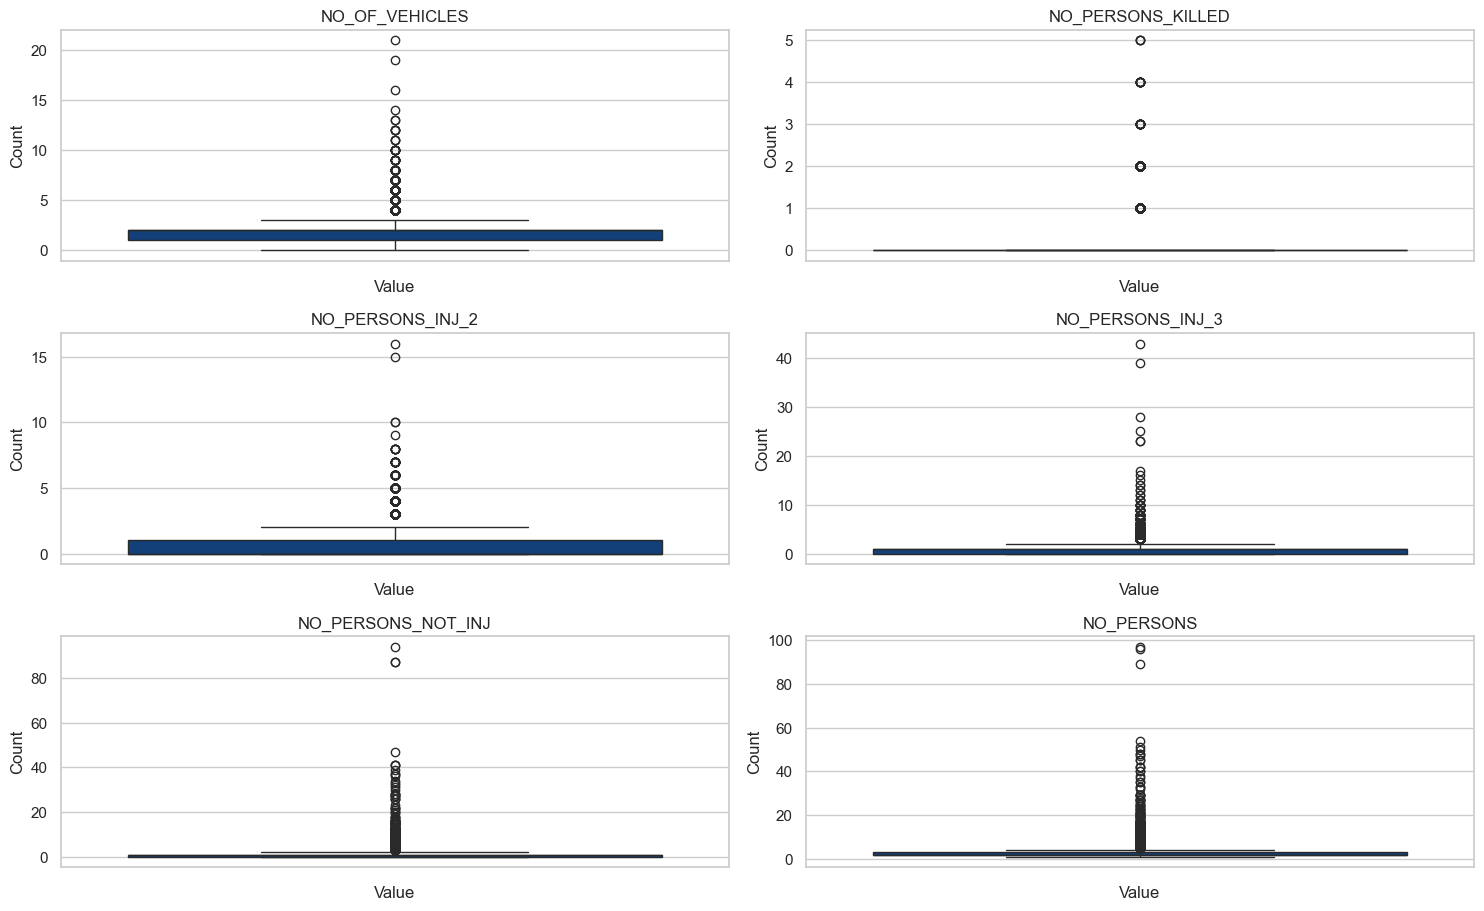

In [672]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))  # adjust rows/cols as needed
axes = axes.flatten()  # flatten to 1D array for easy looping

# Plot each column as bar chart
for i, col in enumerate(accidents_numerical):
    sns.boxplot(data=accidents[accidents_numerical], y=col, ax=axes[i])
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Count")

# Hide any unused axes if columns < subplot cells
for j in range(len(accidents_numerical), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

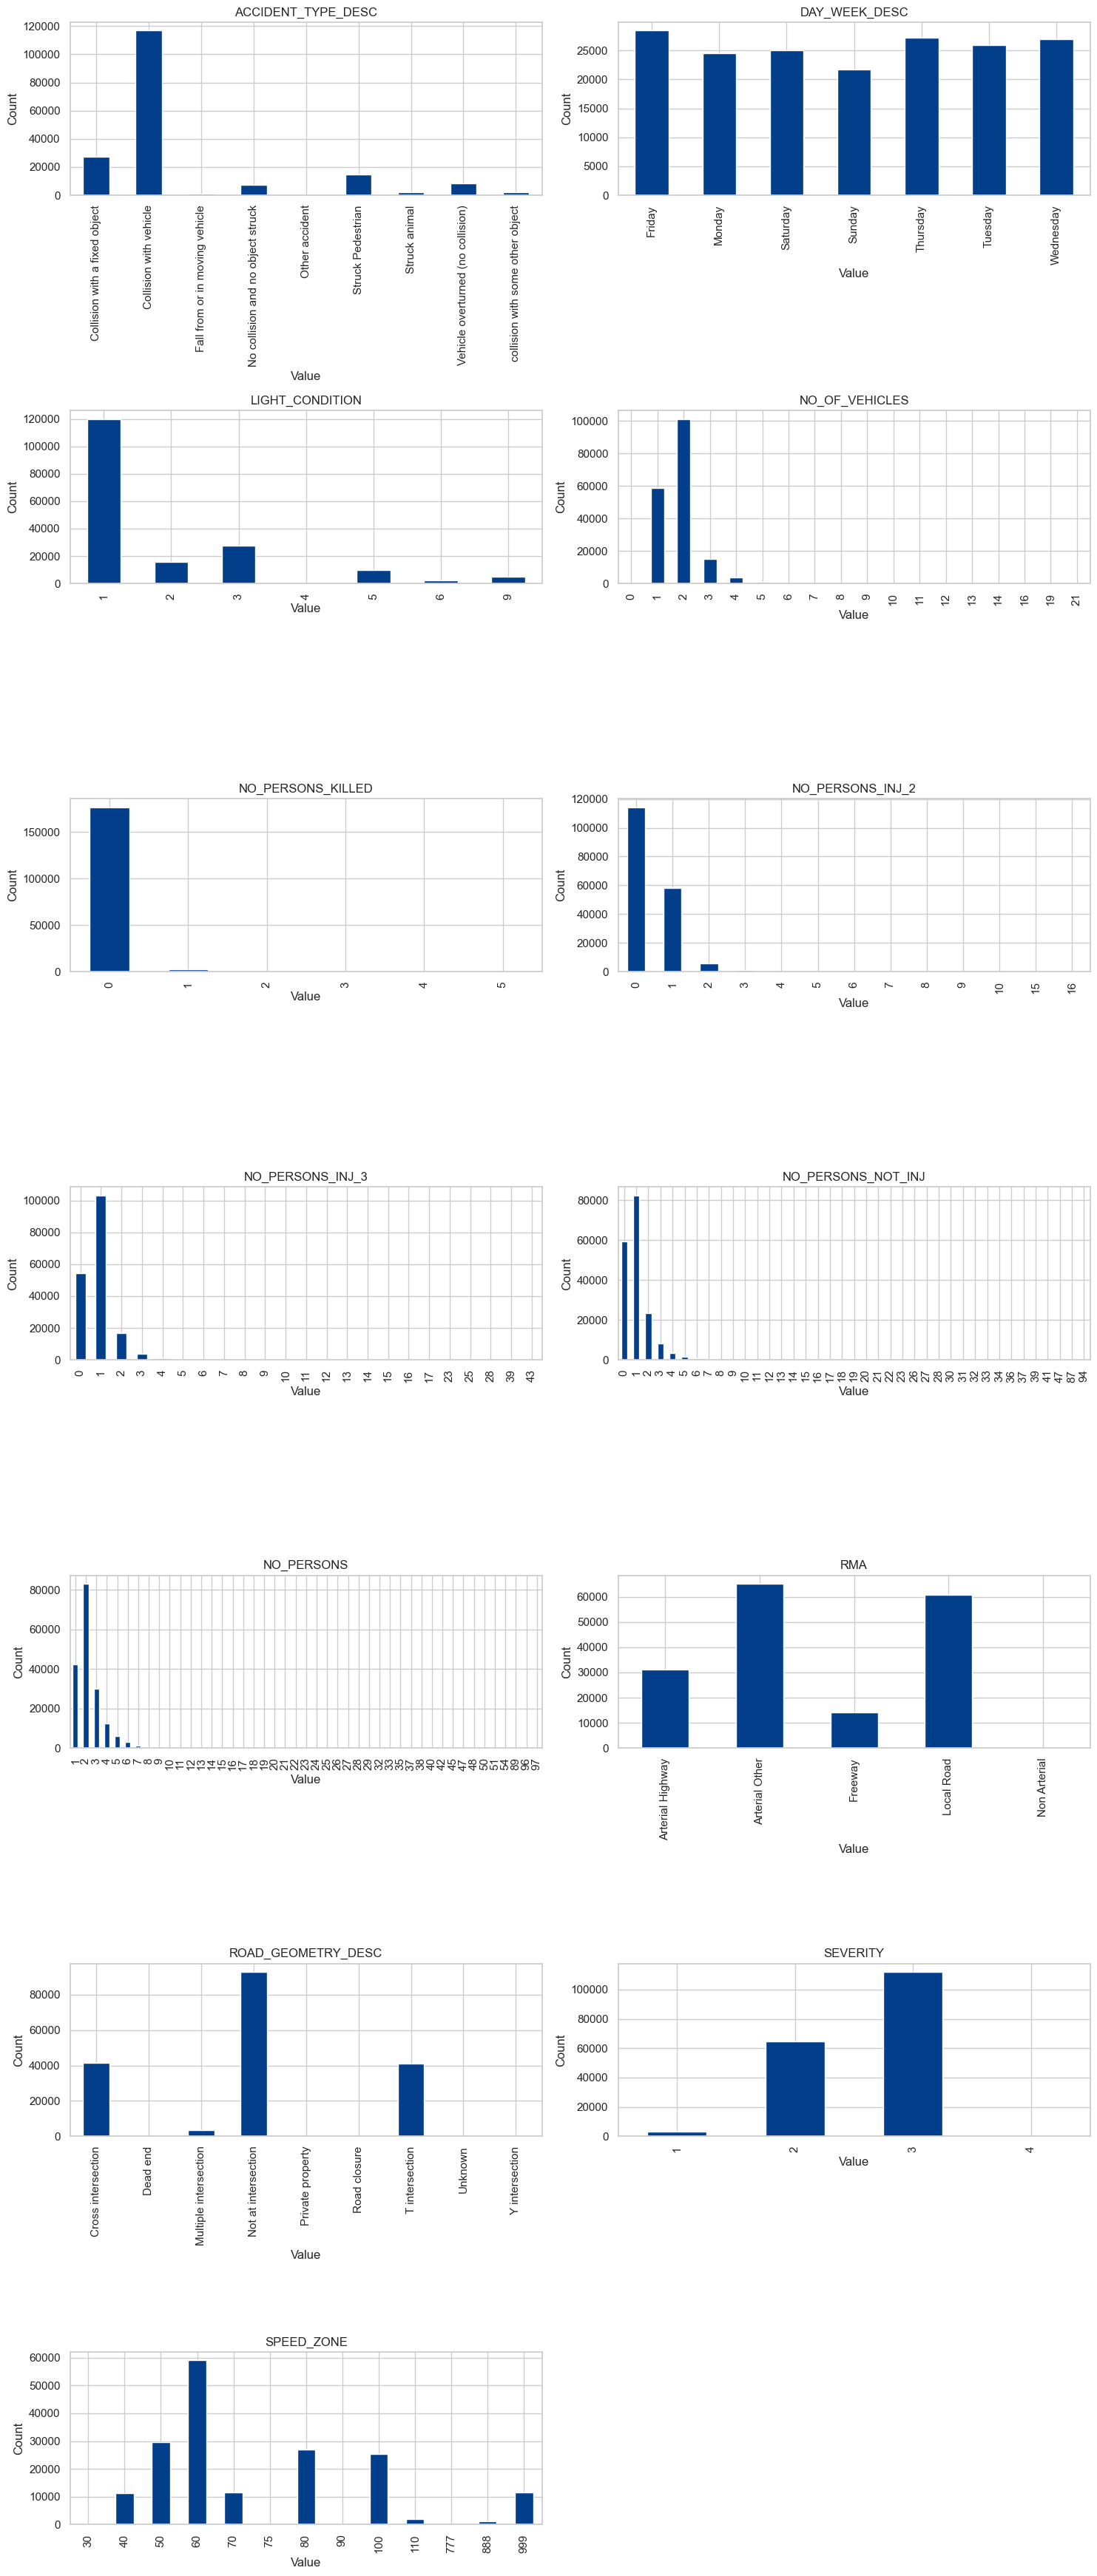

In [1145]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 35))  # adjust rows/cols as needed
axes = axes.flatten()  # flatten to 1D array for easy looping

columns = ['ACCIDENT_TYPE_DESC',
       'DAY_WEEK_DESC', 'LIGHT_CONDITION', 'NO_OF_VEHICLES',
       'NO_PERSONS_KILLED', 'NO_PERSONS_INJ_2', 'NO_PERSONS_INJ_3',
       'NO_PERSONS_NOT_INJ', 'NO_PERSONS', 'RMA',
       'ROAD_GEOMETRY_DESC', 'SEVERITY', 'SPEED_ZONE']
# Plot each column as bar chart
for i, col in enumerate(columns):
    accidents[col].value_counts().sort_index().plot.bar(ax=axes[i])
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Count")

# Hide any unused axes if columns < subplot cells
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

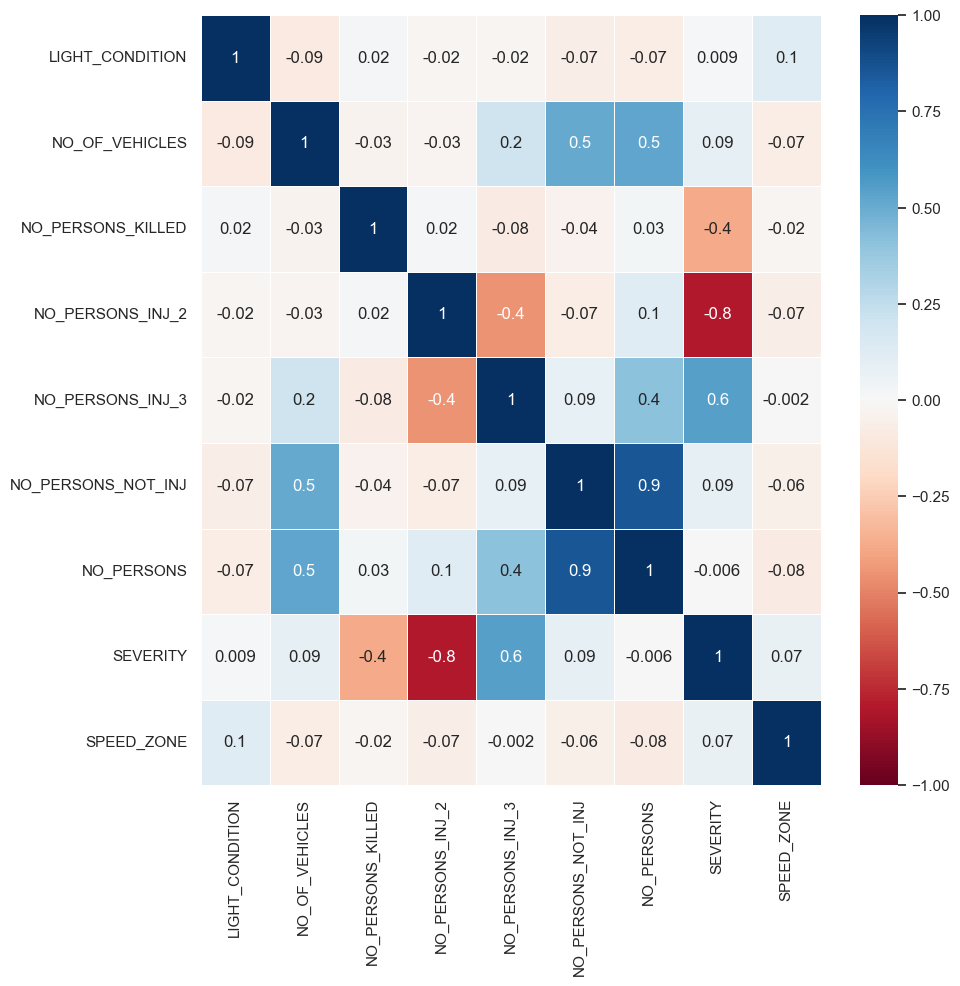

In [1144]:
numerical_col = ['LIGHT_CONDITION', 'NO_OF_VEHICLES',
       'NO_PERSONS_KILLED', 'NO_PERSONS_INJ_2', 'NO_PERSONS_INJ_3',
       'NO_PERSONS_NOT_INJ', 'NO_PERSONS', 'SEVERITY', 'SPEED_ZONE']
fig, ax = plt.subplots(figsize=(10,10))
cm = sns.heatmap(accidents[numerical_col].corr(), linewidths = .5, cmap="RdBu", annot=True, fmt='.1g', vmin=-1, vmax=1)

Vehicle Dataset

In [662]:
vehicles.head()

,ACCIDENT_NO,VEHICLE_ID,VEHICLE_YEAR_MANUF,ROAD_SURFACE_TYPE_DESC,VEHICLE_MAKE,VEHICLE_POWER,VEHICLE_TYPE_DESC,VEHICLE_WEIGHT,TARE_WEIGHT,CARRY_CAPACITY,CUBIC_CAPACITY,LAMPS,LEVEL_OF_DAMAGE
0,T20120000009,A,1996.0,Paved,HOLDEN,NaN,Car,NaN,1350.0,NaN,NaN,1.0,5
1,T20120000012,A,2002.0,Paved,HOLDEN,NaN,Car,NaN,1600.0,NaN,NaN,1.0,2
2,T20120000012,B,1988.0,Paved,TOYOTA,NaN,Car,1450.0,1150.0,300.0,NaN,9.0,4
3,T20120000013,A,1997.0,Paved,MITSUB,NaN,Car,NaN,1300.0,NaN,NaN,1.0,4
4,T20120000013,B,2010.0,Paved,TOYOTA,NaN,Station Wagon,NaN,2250.0,NaN,NaN,2.0,4


In [663]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328057 entries, 0 to 328056
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ACCIDENT_NO             328057 non-null  object 
 1   VEHICLE_ID              328057 non-null  object 
 2   VEHICLE_YEAR_MANUF      321128 non-null  float64
 3   ROAD_SURFACE_TYPE_DESC  328056 non-null  object 
 4   VEHICLE_MAKE            309812 non-null  object 
 5   VEHICLE_POWER           0 non-null       float64
 6   VEHICLE_TYPE_DESC       328057 non-null  object 
 7   VEHICLE_WEIGHT          40982 non-null   float64
 8   TARE_WEIGHT             316113 non-null  float64
 9   CARRY_CAPACITY          40828 non-null   float64
 10  CUBIC_CAPACITY          45409 non-null   float64
 11  LAMPS                   328056 non-null  float64
 12  LEVEL_OF_DAMAGE         328057 non-null  int64  
dtypes: float64(7), int64(1), object(5)
memory usage: 32.5+ MB


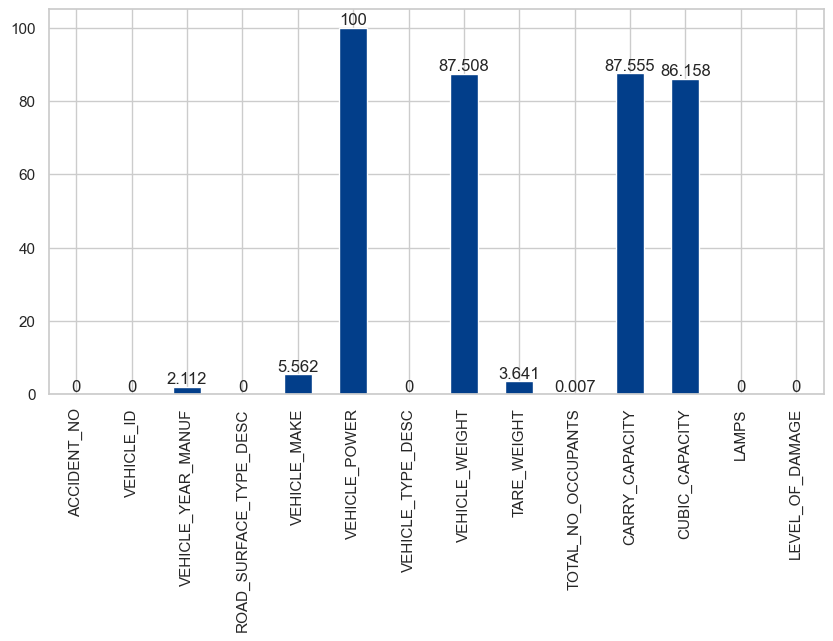

In [676]:
ax = round(((vehicles.isnull().sum() / len(vehicles)) * 100),3).plot.bar(figsize=(10,5), color='#023E8A')
ax.bar_label(ax.containers[0])
plt.show()

In [1146]:
vehicles.drop(['VEHICLE_POWER', 'CUBIC_CAPACITY', 'VEHICLE_WEIGHT', 'CARRY_CAPACITY'], axis = 1, inplace=True)

C:\Users\phucd\AppData\Local\Temp\ipykernel_24592\2457031116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicles.drop(['VEHICLE_POWER', 'CUBIC_CAPACITY', 'VEHICLE_WEIGHT', 'CARRY_CAPACITY'], axis = 1, inplace=True)


In [1147]:
vehicles['LAMPS'] = vehicles['LAMPS'].astype('O')
vehicles['LEVEL_OF_DAMAGE'] = vehicles['LEVEL_OF_DAMAGE'].astype('O')

C:\Users\phucd\AppData\Local\Temp\ipykernel_24592\2816087664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicles['LAMPS'] = vehicles['LAMPS'].astype('O')
C:\Users\phucd\AppData\Local\Temp\ipykernel_24592\2816087664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicles['LEVEL_OF_DAMAGE'] = vehicles['LEVEL_OF_DAMAGE'].astype('O')


In [667]:
vehicles_categorical = []
vehicles_numerical = []

for i in vehicles.columns:
    if vehicles[i].dtype == 'O':
        vehicles_categorical.append(i)
    
for i in vehicles.columns:
    if i not in vehicles_categorical:
        vehicles_numerical.append(i)

print(vehicles_categorical)
print(vehicles_numerical)

['ACCIDENT_NO', 'VEHICLE_ID', 'ROAD_SURFACE_TYPE_DESC', 'VEHICLE_MAKE', 'VEHICLE_TYPE_DESC', 'LAMPS', 'LEVEL_OF_DAMAGE']
['VEHICLE_YEAR_MANUF', 'TARE_WEIGHT']


In [668]:
vehicles[vehicles_categorical].describe()

,ACCIDENT_NO,VEHICLE_ID,ROAD_SURFACE_TYPE_DESC,VEHICLE_MAKE,VEHICLE_TYPE_DESC,LAMPS,LEVEL_OF_DAMAGE
count,328057,328057,328056,309812,328057,328056.0,328057
unique,179868,21,4,641,29,4.0,7
top,T20160000627,A,Paved,TOYOTA,Car,2.0,1
freq,21,179025,311433,54258,156717,267123.0,74360


In [244]:
vehicles[vehicles_numerical].describe()

,VEHICLE_YEAR_MANUF,TARE_WEIGHT,TOTAL_NO_OCCUPANTS
count,321128.000000,316113.000000,328035.000000
mean,1837.879475,1554.931610,1.246812
std,559.044704,1704.788442,0.842449
min,0.000000,0.000000,0.000000
25%,2001.000000,1100.000000,1.000000
50%,2008.000000,1400.000000,1.000000
75%,2013.000000,1675.000000,1.000000
max,3001.000000,96000.000000,96.000000


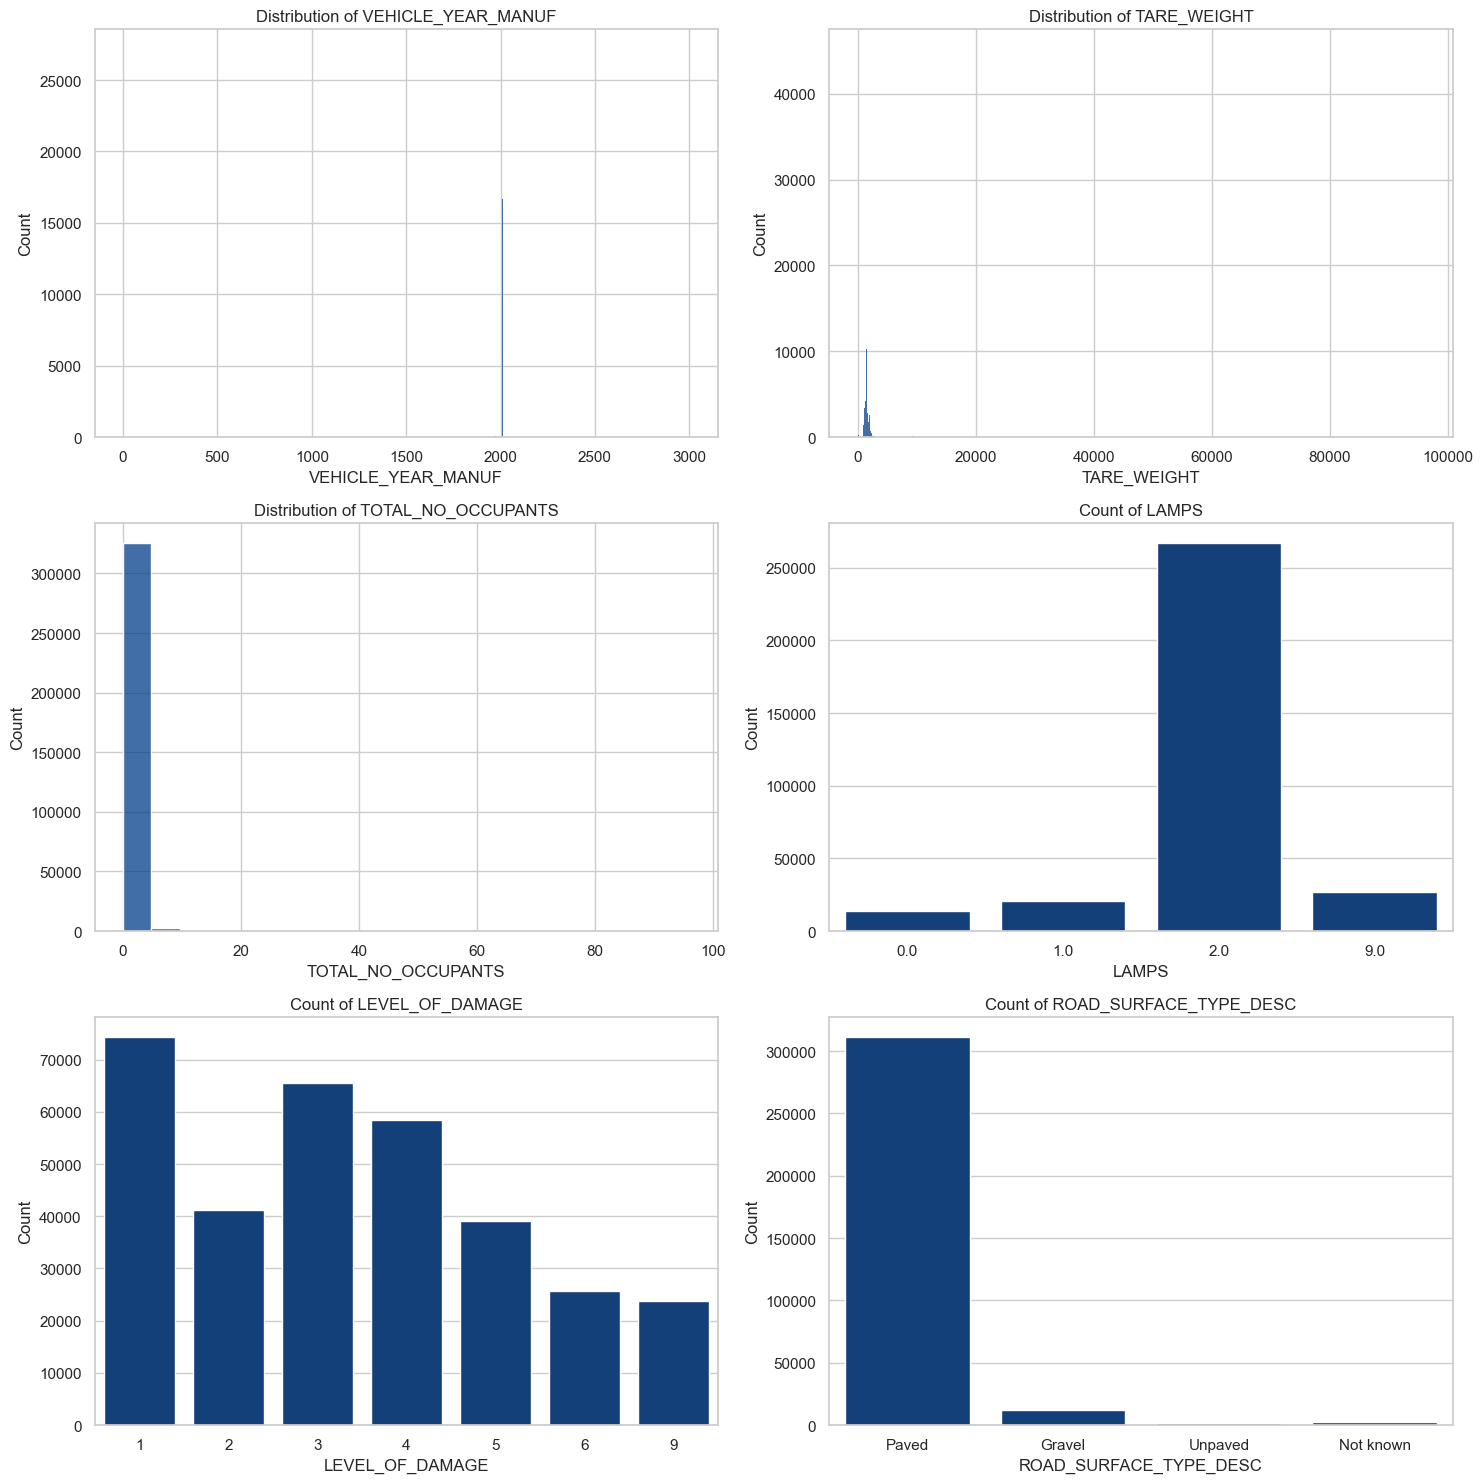

In [620]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten()

# Plot numerical columns
for i, col in enumerate(vehicles_numerical):
    sns.histplot(data=vehicles, x=col, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_ylabel("Count")

# Plot categorical columns at the end
categorical_cols = ['LAMPS', 'LEVEL_OF_DAMAGE','ROAD_SURFACE_TYPE_DESC']

for j, cat_col in enumerate(categorical_cols, start=len(vehicles_numerical)):
    sns.countplot(data=vehicles, x=cat_col, ax=axes[j])
    axes[j].set_title(f"Count of {cat_col}")
    axes[j].set_ylabel("Count")

for k in range(len(vehicles_numerical) + len(categorical_cols), len(axes)):
    fig.delaxes(axes[k])

plt.tight_layout()
plt.show()

In [453]:
vehicles[vehicles['TARE_WEIGHT'] > 90000]

,ACCIDENT_NO,VEHICLE_ID,VEHICLE_YEAR_MANUF,ROAD_SURFACE_TYPE_DESC,VEHICLE_MAKE,VEHICLE_TYPE_DESC,TARE_WEIGHT,TOTAL_NO_OCCUPANTS,LAMPS,LEVEL_OF_DAMAGE
151722,T20170019068,A,2014.0,Paved,KENWTH,Prime Mover - Single Trailer,96000.0,1.0,1.0,5


In [198]:
vehicles.VEHICLE_YEAR_MANUF.value_counts(normalize=True).sort_index(ascending=False) * 100

VEHICLE_YEAR_MANUF
3001.0    0.000311
2024.0    0.042662
2023.0    0.424130
2022.0    0.816185
2021.0    1.131013
            ...   
1913.0    0.000311
1910.0    0.000311
1909.0    0.000311
1900.0    0.062903
0.0       8.467340
Name: proportion, Length: 104, dtype: float64

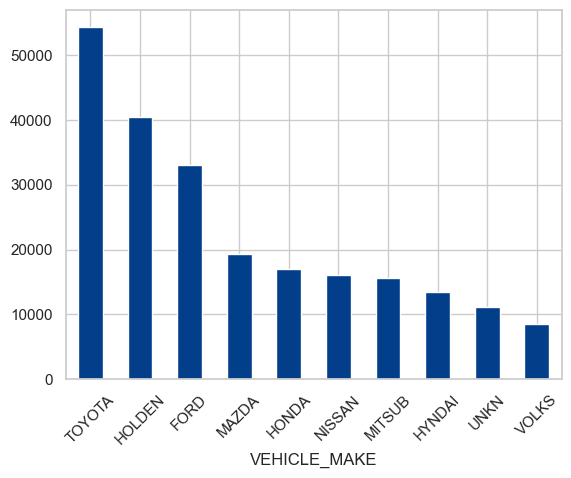

In [291]:
vehicles['VEHICLE_MAKE'].value_counts().sort_values(ascending=False).head(10).plot.bar()
plt.tick_params(axis='x', rotation=45)

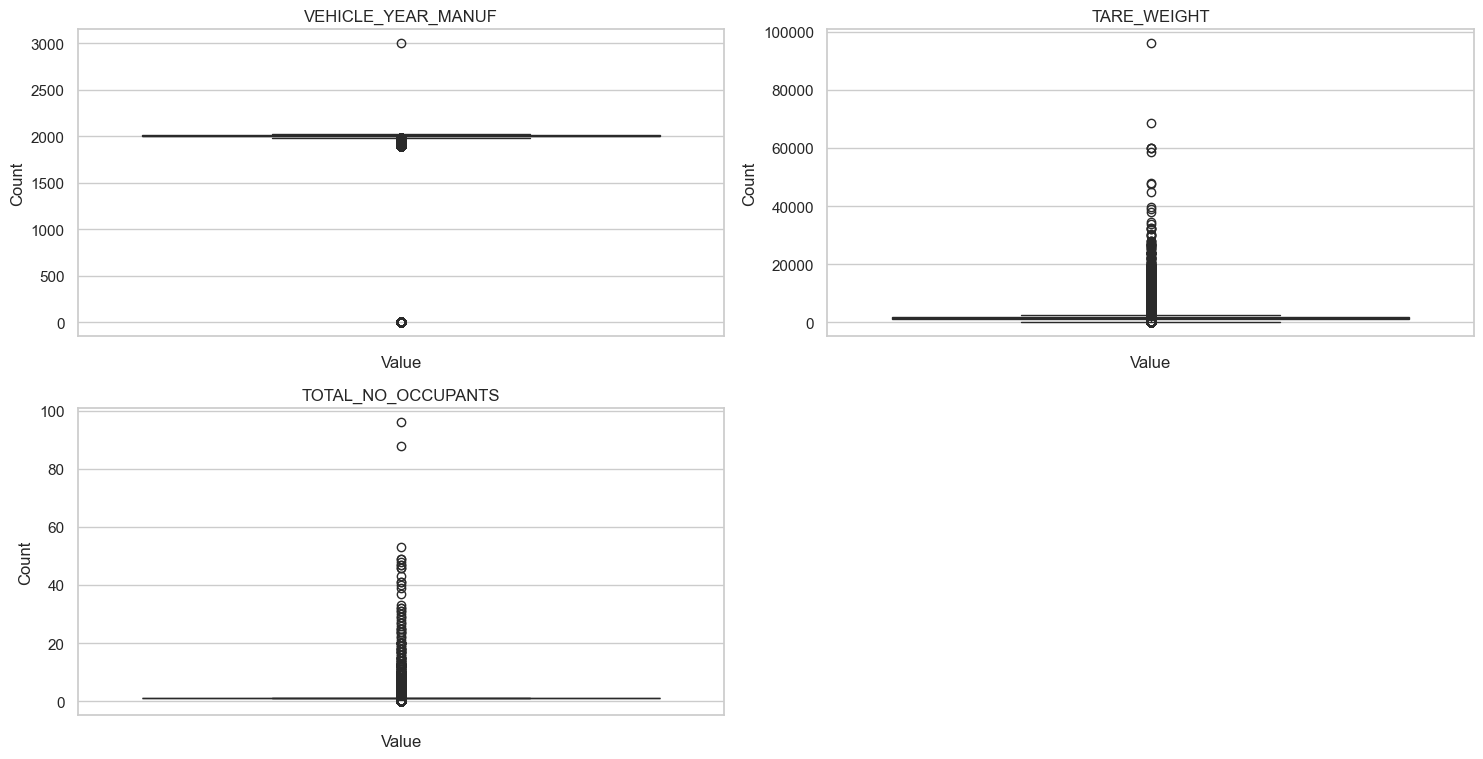

In [621]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))  # adjust rows/cols as needed
axes = axes.flatten()  # flatten to 1D array for easy looping

# Plot each column as bar chart
for i, col in enumerate(vehicles_numerical):
    sns.boxplot(data=vehicles[vehicles_numerical], y=col, ax=axes[i])
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Count")

# Hide any unused axes if columns < subplot cells
for j in range(len(vehicles_numerical), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

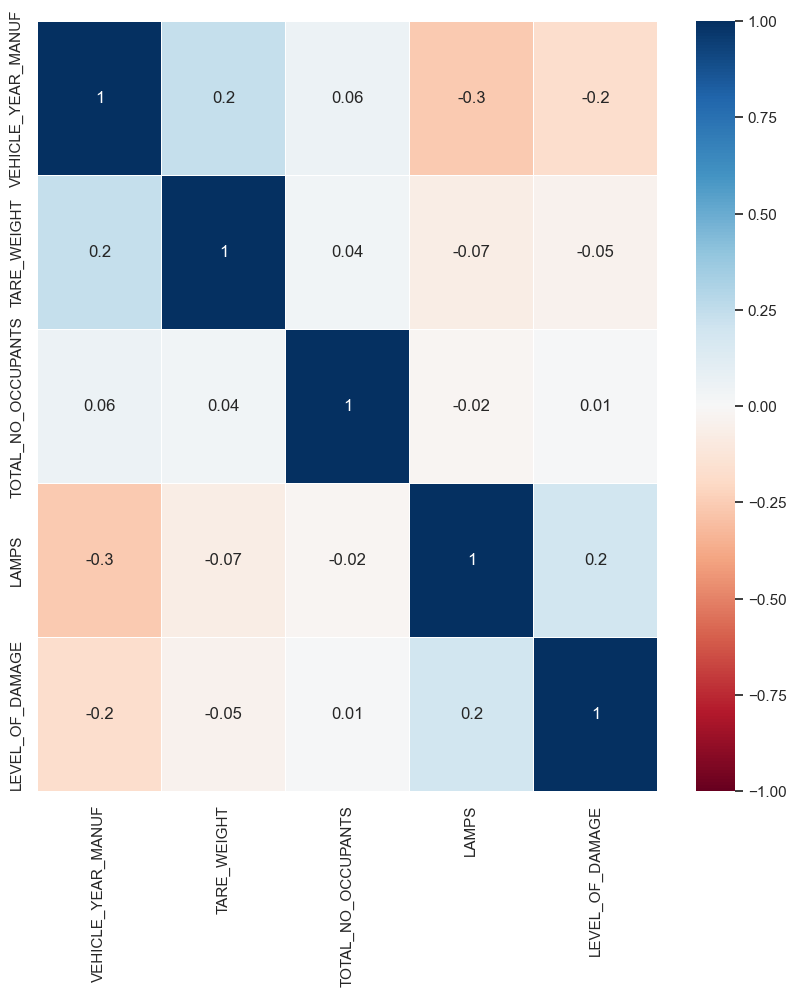

In [677]:
numerical_col = ['VEHICLE_YEAR_MANUF', 'TARE_WEIGHT', 'TOTAL_NO_OCCUPANTS', 'LAMPS', 'LEVEL_OF_DAMAGE']
fig, ax = plt.subplots(figsize=(10,10))
cm = sns.heatmap(vehicles[numerical_col].corr(), linewidths = .5, cmap="RdBu", annot=True, ax=ax, fmt='.1g', vmin=-1, vmax=1)

Person Dataset

In [100]:
person.head()

,ACCIDENT_NO,PERSON_ID,SEX,AGE_GROUP,INJ_LEVEL_DESC,SEATING_POSITION,HELMET_BELT_WORN,ROAD_USER_TYPE_DESC,TAKEN_HOSPITAL
0,T20240013592,B,U,Unknown,Not injured,D,9.0,Drivers,NaN
1,T20240013592,A,M,40-49,Other injury,D,1.0,Drivers,N
2,T20210001147,B,M,30-39,Not injured,D,9.0,Drivers,NaN
3,T20240001333,02,U,Unknown,Not injured,LF,9.0,Passengers,NaN
4,T20240001333,A,M,30-39,Not injured,D,9.0,Drivers,NaN


In [102]:
person.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420320 entries, 0 to 420319
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ACCIDENT_NO          420320 non-null  object 
 1   PERSON_ID            420320 non-null  object 
 2   SEX                  420285 non-null  object 
 3   AGE_GROUP            420320 non-null  object 
 4   INJ_LEVEL_DESC       420320 non-null  object 
 5   SEATING_POSITION     403452 non-null  object 
 6   HELMET_BELT_WORN     420319 non-null  float64
 7   ROAD_USER_TYPE_DESC  420320 non-null  object 
 8   TAKEN_HOSPITAL       149828 non-null  object 
dtypes: float64(1), object(8)
memory usage: 28.9+ MB


In [1148]:
person['HELMET_BELT_WORN'] = person['HELMET_BELT_WORN'].astype('O')

C:\Users\phucd\AppData\Local\Temp\ipykernel_24592\3561666803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  person['HELMET_BELT_WORN'] = person['HELMET_BELT_WORN'].astype('O')


In [684]:
person.duplicated().sum()

np.int64(0)

<Axes: >

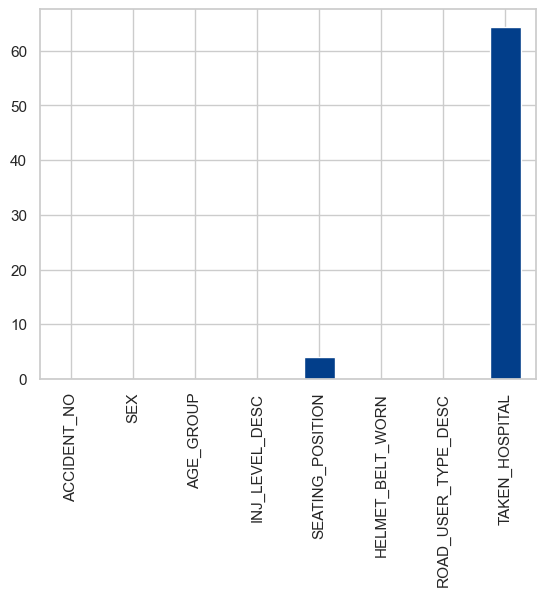

In [294]:
(person.isnull().sum()/len(person) * 100).plot.bar()

In [105]:
person[person['SEATING_POSITION'].isna()]['HELMET_BELT_WORN'].value_counts(normalize=True) * 100

HELMET_BELT_WORN
8.0    99.917003
9.0     0.077069
2.0     0.005928
Name: proportion, dtype: float64

In [106]:
person[person['TAKEN_HOSPITAL'].isnull()]['INJ_LEVEL_DESC'].value_counts(normalize=True) * 100

INJ_LEVEL_DESC
Not injured       68.513671
Other injury      30.273723
Fatality           0.615175
Serious injury     0.597430
Name: proportion, dtype: float64

In [107]:
person.duplicated().sum()

np.int64(0)

In [108]:
person.describe()

,ACCIDENT_NO,PERSON_ID,SEX,AGE_GROUP,INJ_LEVEL_DESC,SEATING_POSITION,HELMET_BELT_WORN,ROAD_USER_TYPE_DESC,TAKEN_HOSPITAL
count,420320,420320,420285,420320,420320,403452,420319.0,420320,149828
unique,179877,116,3,14,4,10,9.0,8,2
top,T20130018492,A,M,30-39,Not injured,D,1.0,Drivers,N
freq,97,175610,236145,75183,185967,310257,229862.0,266172,75383


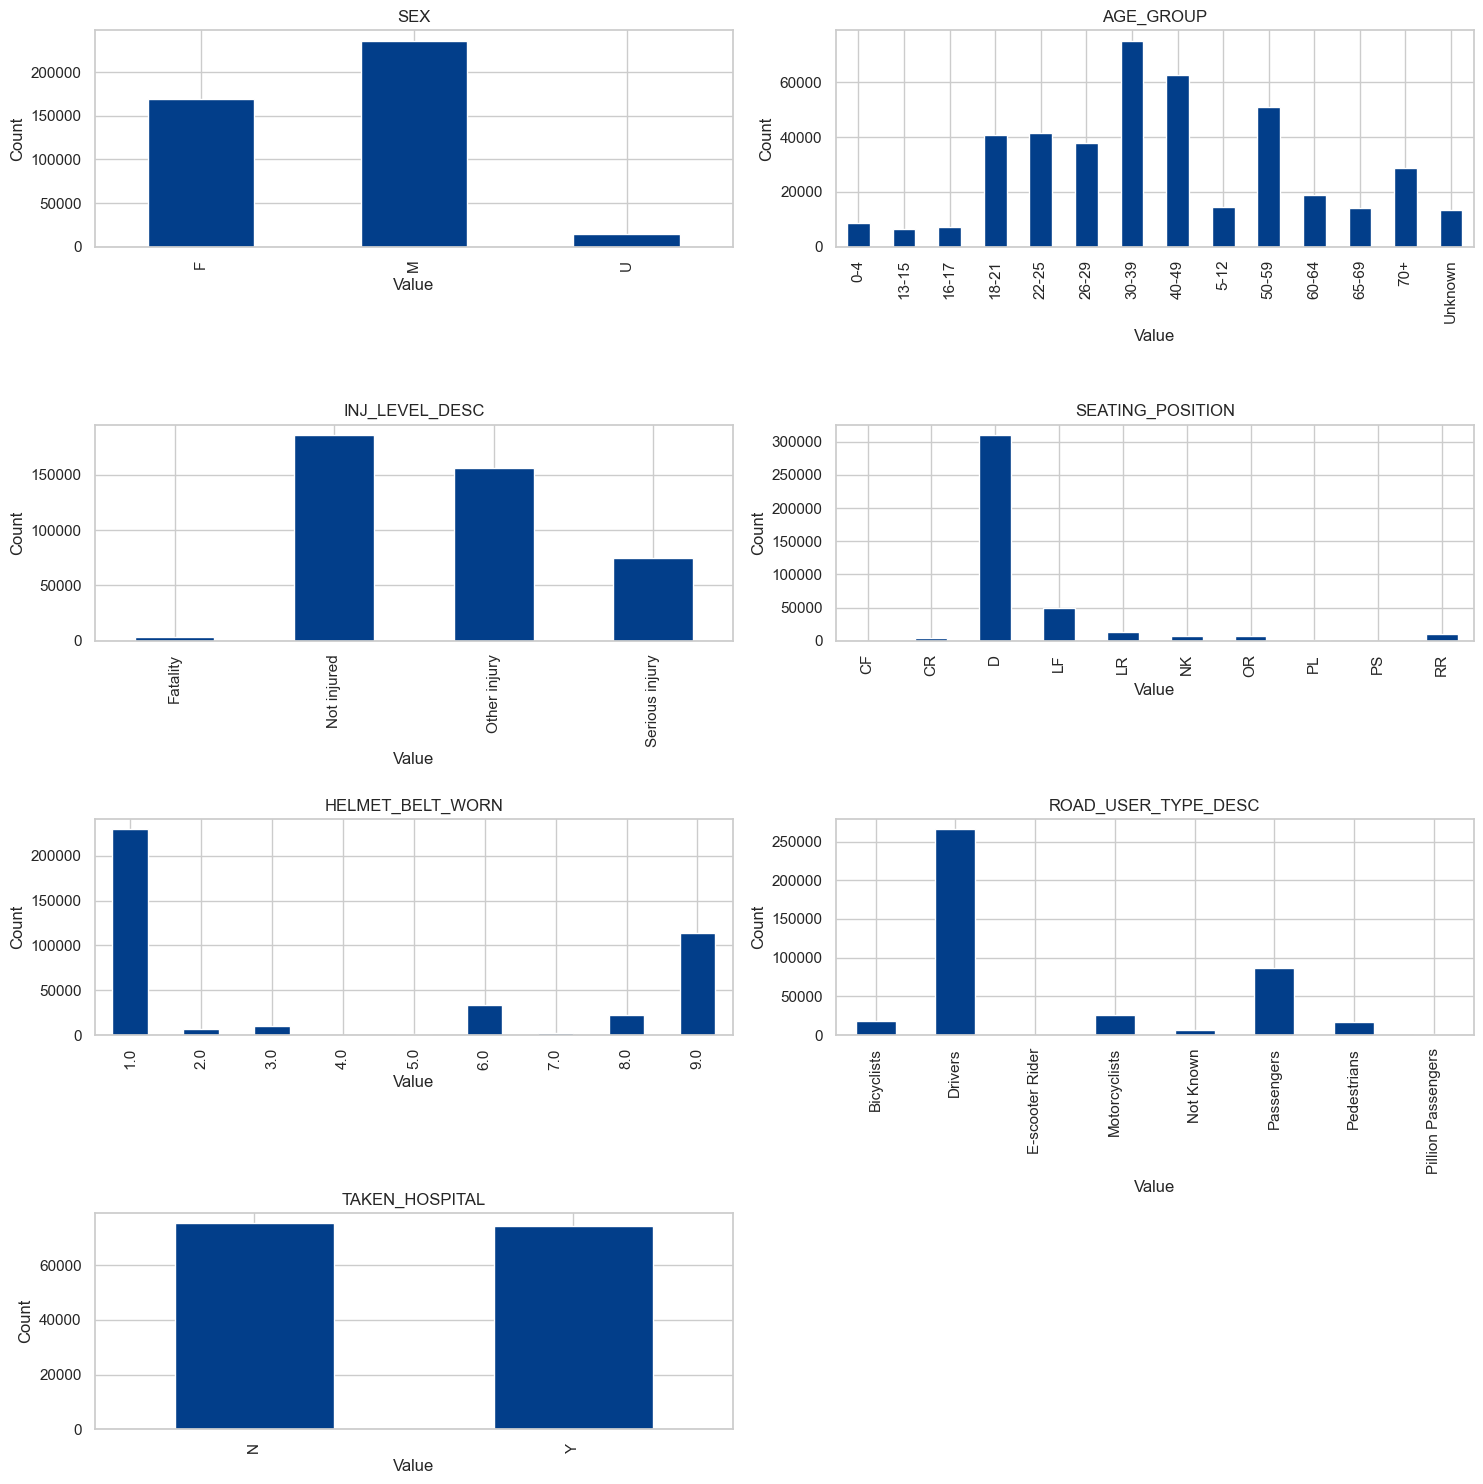

In [685]:
column = ['SEX', 'AGE_GROUP', 'INJ_LEVEL_DESC',
       'SEATING_POSITION', 'HELMET_BELT_WORN', 'ROAD_USER_TYPE_DESC',
       'TAKEN_HOSPITAL']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))  # adjust rows/cols as needed
axes = axes.flatten()  # flatten to 1D array for easy looping

# Plot each column as bar chart
for i, col in enumerate(column):
    person[col].value_counts().sort_index().plot.bar(ax=axes[i])
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Count")

# Hide any unused axes if columns < subplot cells
for j in range(len(column), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Location Dataset

In [110]:
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179877 entries, 0 to 179876
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ACCIDENT_NO    179877 non-null  object
 1   ROAD_NAME      179657 non-null  object
 2   ROAD_TYPE      177527 non-null  object
 3   ROAD_NAME_INT  179186 non-null  object
 4   ROAD_TYPE_INT  177705 non-null  object
dtypes: object(5)
memory usage: 6.9+ MB


In [686]:
location.duplicated().sum()

np.int64(0)

<Axes: >

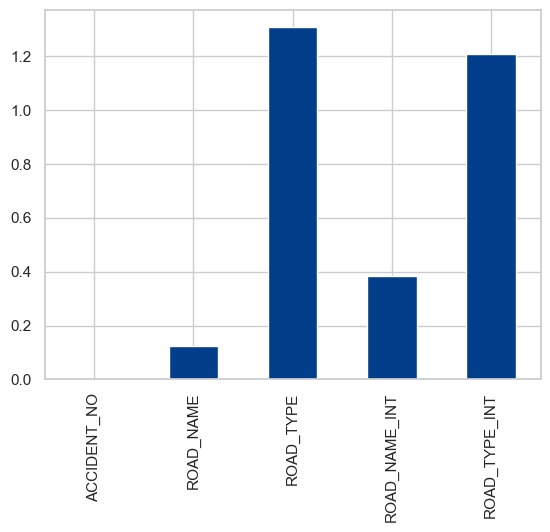

In [296]:
(location.isnull().sum()/len(location) * 100).plot.bar()

Node Dataset

In [112]:
node.head()

,ACCIDENT_NO,AMG_X,AMG_Y,LGA_NAME,LGA NAME ALL,DEG_URBAN_NAME,LATITUDE,LONGITUDE,POSTCODE_CRASH
0,T20120028741,2497568.320,2409445.265,MELBOURNE,MELBOURNE,MELB_URBAN,-37.816010,144.972382,3000
1,T20120001763,2497122.206,2409527.753,MELBOURNE,MELBOURNE,MELBOURNE_CBD,-37.815265,144.967316,3000
2,T20120028741,2497568.320,2409445.265,MELBOURNE,MELBOURNE,MELBOURNE_CBD,-37.816010,144.972382,3000
3,T20140002916,2497475.110,2409905.366,MELBOURNE,MELBOURNE,MELBOURNE_CBD,-37.811864,144.971325,3000
4,T20120009149,2496252.604,2411020.384,MELBOURNE,MELBOURNE,MELB_URBAN,-37.801813,144.957447,3000


In [113]:
node.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182633 entries, 0 to 182632
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ACCIDENT_NO     182633 non-null  object 
 1   AMG_X           182633 non-null  float64
 2   AMG_Y           182633 non-null  float64
 3   LGA_NAME        182633 non-null  object 
 4   LGA NAME ALL    182632 non-null  object 
 5   DEG_URBAN_NAME  181730 non-null  object 
 6   LATITUDE        182633 non-null  float64
 7   LONGITUDE       182633 non-null  float64
 8   POSTCODE_CRASH  182633 non-null  int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 12.5+ MB


<Axes: >

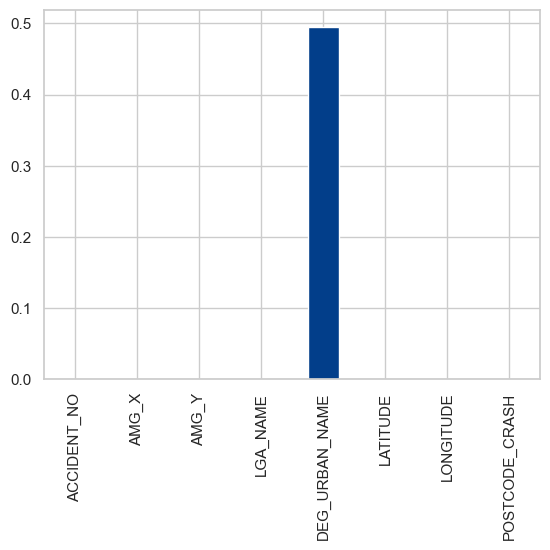

In [297]:
(node.isnull().sum() / len(node) * 100).plot.bar()

In [687]:
node.duplicated().sum()

np.int64(184)

In [688]:
node = node[~node.duplicated()]

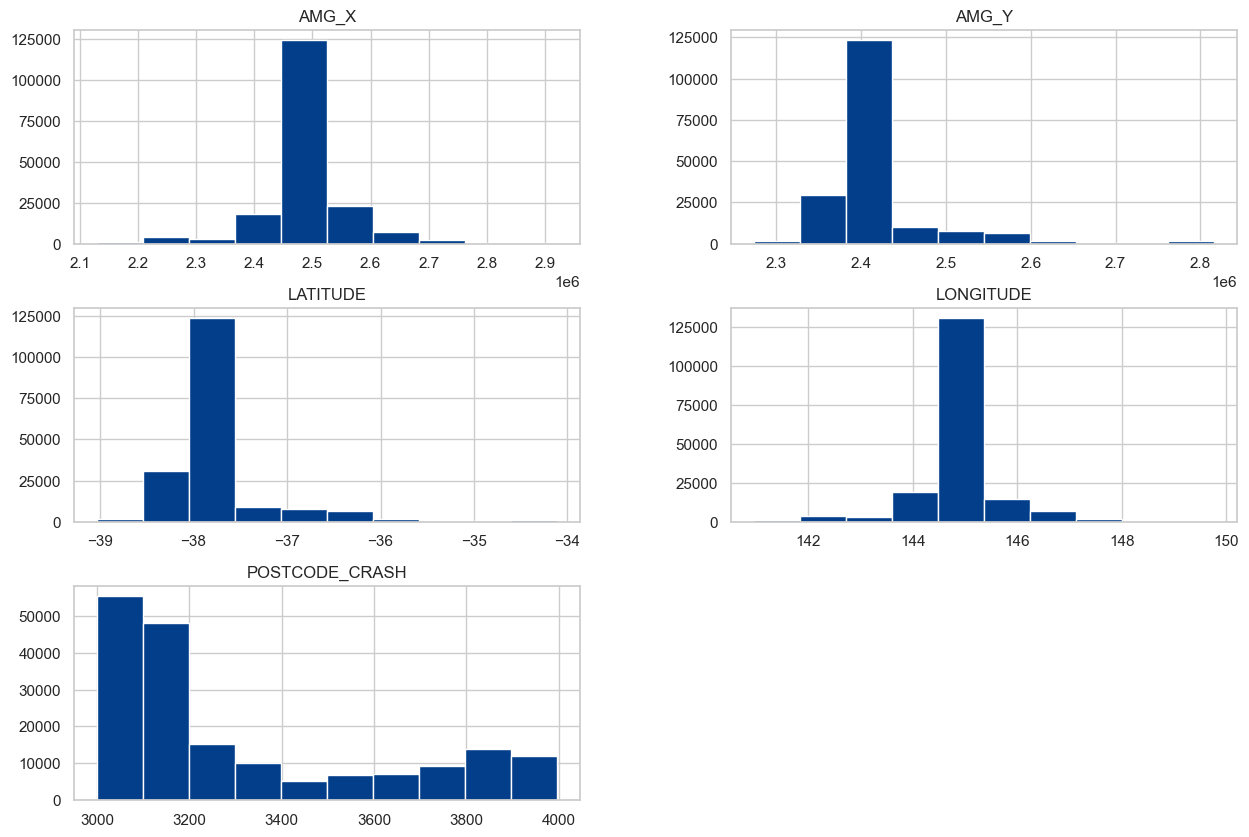

In [298]:
node.hist(figsize=(15,10))
plt.show()

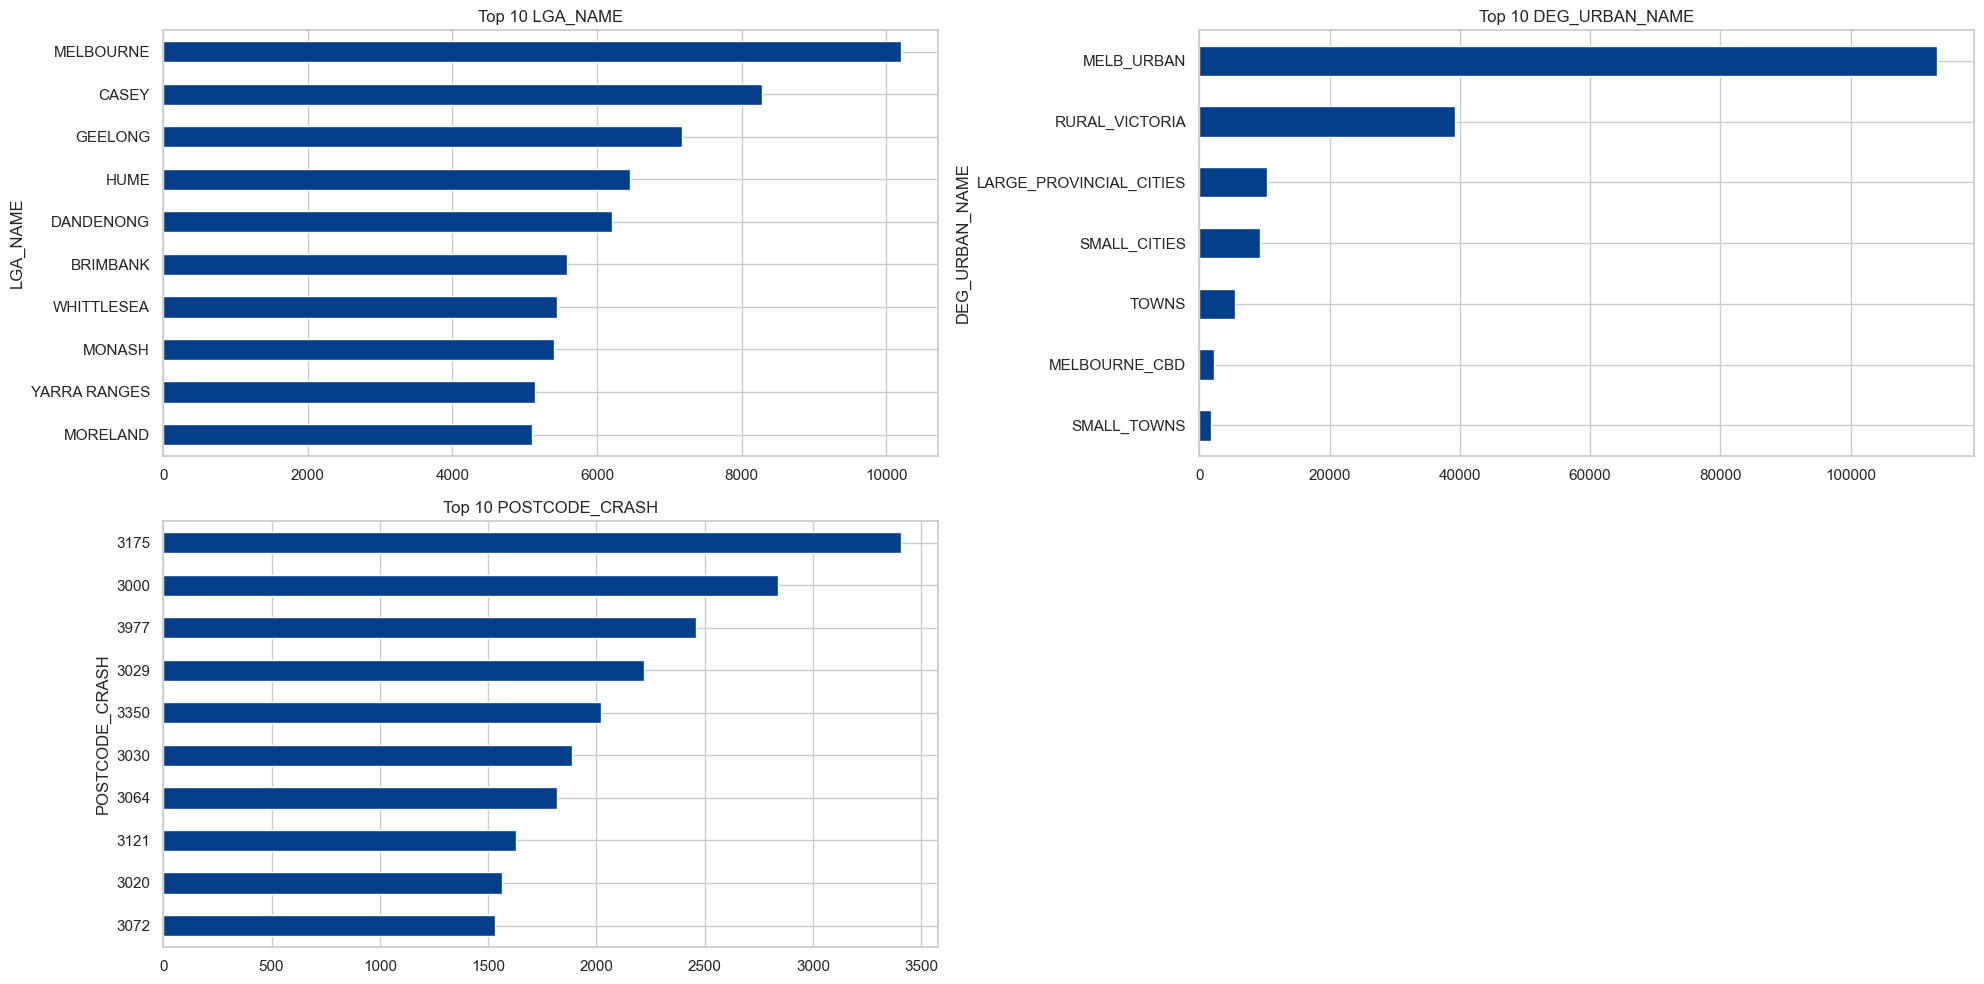

In [1149]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
axes = axes.flatten()

categorical_cols = ['LGA_NAME', 'DEG_URBAN_NAME', 'POSTCODE_CRASH']

for i, col in enumerate(categorical_cols):
    node[col].value_counts().sort_values(ascending=True).tail(10).plot.barh(ax=axes[i])
    axes[i].set_title(f"Top 10 {col}")

fig.delaxes(axes[len(categorical_cols)])

plt.tight_layout()
plt.show()

III. Data Preperation

In [1150]:
accidents["ACCIDENT_DATE"] = pd.to_datetime(accidents["ACCIDENT_DATE"]) #set ACCIDENT_DATE to datetime datatype
accidents['ACCIDENT_TIME'] = pd.to_datetime(accidents['ACCIDENT_TIME'], format='%H:%M:%S', errors='coerce')

C:\Users\phucd\AppData\Local\Temp\ipykernel_24592\989076073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents["ACCIDENT_DATE"] = pd.to_datetime(accidents["ACCIDENT_DATE"]) #set ACCIDENT_DATE to datetime datatype
C:\Users\phucd\AppData\Local\Temp\ipykernel_24592\989076073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents['ACCIDENT_TIME'] = pd.to_datetime(accidents['ACCIDENT_TIME'], format='%H:%M:%S', errors='coerce')


In [202]:
accidents.head()

,ACCIDENT_NO,ACCIDENT_DATE,ACCIDENT_TIME,ACCIDENT_TYPE_DESC,DAY_WEEK_DESC,LIGHT_CONDITION,NO_OF_VEHICLES,NO_PERSONS_KILLED,NO_PERSONS_INJ_2,NO_PERSONS_INJ_3,NO_PERSONS_NOT_INJ,NO_PERSONS,POLICE_ATTEND,ROAD_GEOMETRY_DESC,SEVERITY,SPEED_ZONE,SEASON
0,T20120000009,2012-01-01,1900-01-01 02:25:00,Collision with a fixed object,Sunday,5,1,0,0,2,0,2,1,Not at intersection,3,100,Summer
1,T20120000012,2012-01-01,1900-01-01 02:00:00,Collision with vehicle,Sunday,3,2,0,1,0,2,3,1,Cross intersection,2,80,Summer
2,T20120000013,2012-01-01,1900-01-01 03:35:00,Collision with vehicle,Sunday,3,2,0,1,0,0,1,1,T intersection,2,60,Summer
3,T20120000018,2012-01-01,1900-01-01 05:15:00,Collision with a fixed object,Sunday,5,1,0,0,1,0,1,1,Cross intersection,3,100,Summer
4,T20120000021,2012-01-01,1900-01-01 07:30:00,Collision with a fixed object,Sunday,1,1,0,0,2,1,3,1,Not at intersection,3,50,Summer


In [1151]:
# Function to map months to seasons (assuming Australia/Southern Hemisphere)
def get_season(month):
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    else:
        return 'Spring'
    
accidents['SEASON'] = accidents['ACCIDENT_DATE'].dt.month.apply(get_season)

C:\Users\phucd\AppData\Local\Temp\ipykernel_24592\2713458877.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents['SEASON'] = accidents['ACCIDENT_DATE'].dt.month.apply(get_season)


In [1165]:
accidents['YEAR_MONTH'] = accidents['ACCIDENT_DATE'].dt.to_period('M')

C:\Users\phucd\AppData\Local\Temp\ipykernel_24592\3293134120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents['YEAR_MONTH'] = accidents['ACCIDENT_DATE'].dt.to_period('M')


Vehicle dataset

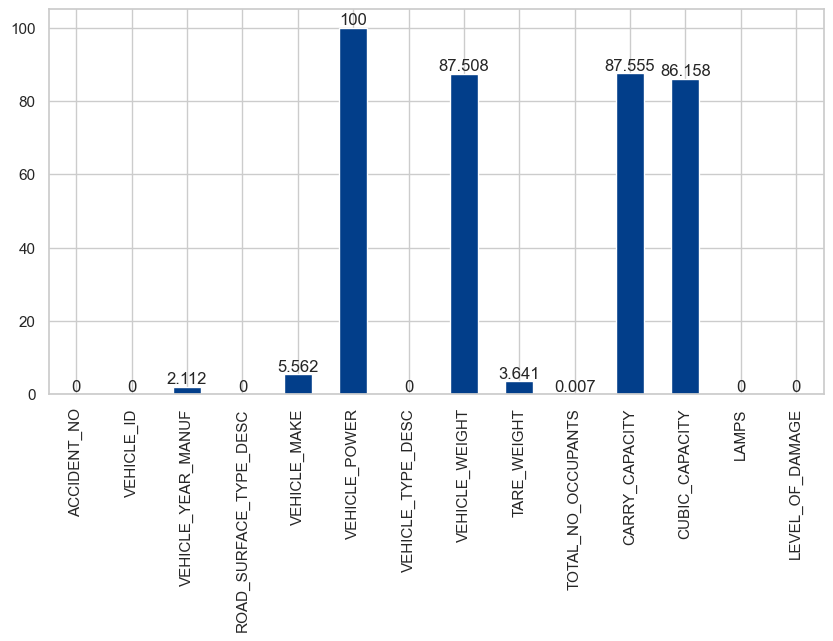

In [692]:
ax = round(((vehicles.isnull().sum() / len(vehicles)) * 100),3).plot.bar(figsize=(10,5))
ax.bar_label(ax.containers[0])
plt.show()


In [693]:
vehicles[['TARE_WEIGHT']]

,TARE_WEIGHT
0,1350.0
1,1600.0
2,1150.0
3,1300.0
4,2250.0
...,...
328052,0.0
328053,0.0
328054,0.0
328055,1628.0


In [1152]:
vehicles['TARE_WEIGHT'] = vehicles['TARE_WEIGHT'].replace(0, np.nan)

C:\Users\phucd\AppData\Local\Temp\ipykernel_24592\3750113415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicles['TARE_WEIGHT'] = vehicles['TARE_WEIGHT'].replace(0, np.nan)


In [1153]:
vehicles[vehicles['TARE_WEIGHT'] == 0]

,ACCIDENT_NO,VEHICLE_ID,VEHICLE_YEAR_MANUF,ROAD_SURFACE_TYPE_DESC,VEHICLE_MAKE,VEHICLE_TYPE_DESC,TARE_WEIGHT,TOTAL_NO_OCCUPANTS,LAMPS,LEVEL_OF_DAMAGE,TRAFFIC_CONTROL_DESC


In [1154]:
vehicles[vehicles.TARE_WEIGHT.isnull()]["VEHICLE_TYPE_DESC"].value_counts(normalize=True) * 100

VEHICLE_TYPE_DESC
Motor Cycle                                           40.731510
Bicycle                                               31.389308
Not Known                                             10.296957
Car                                                    7.609955
Motor Scooter                                          2.685247
Station Wagon                                          1.862122
Other Vehicle                                          1.402296
Tram                                                   1.210994
Utility                                                0.916143
Panel Van                                              0.294851
Taxi                                                   0.256239
Moped                                                  0.201832
Bus/Coach                                              0.166731
Prime Mover - Single Trailer                           0.150935
Heavy Vehicle (Rigid) > 4.5 Tonnes                     0.136895
Quad Bike             

In [1155]:
vehicle_type_with_no_null_tare_weight = vehicles.groupby('VEHICLE_TYPE_DESC')['TARE_WEIGHT'].count()
vehicle_type_with_null_tare_weight = vehicles[vehicles.TARE_WEIGHT.isnull()].VEHICLE_TYPE_DESC.value_counts()

percentage_of_null_tare_weight_all_vehicle_type = vehicle_type_with_null_tare_weight / (vehicle_type_with_no_null_tare_weight + vehicle_type_with_null_tare_weight) * 100

percentage_of_null_tare_weight_all_vehicle_type.sort_values(ascending=False)

VEHICLE_TYPE_DESC
Electric Device                                       100.000000
Horse (ridden or drawn)                               100.000000
Train                                                 100.000000
Bicycle                                                98.697644
Not Known                                              98.489172
Motor Scooter                                          98.392283
Tram                                                   98.011364
Moped                                                  97.457627
Motor Cycle                                            96.458853
Other Vehicle                                          69.117647
Quad Bike                                              49.645390
Rigid Truck(Weight Unknown)                            32.653061
Prime Mover (No of Trailers Unknown)                   21.739130
Not Applicable                                         21.052632
Plant machinery and Agricultural equipment             12.457912
Parked 

In [1156]:
for i in vehicles.VEHICLE_TYPE_DESC.unique():
    median_tare_weight = vehicles[(vehicles.VEHICLE_TYPE_DESC == i)]['TARE_WEIGHT'].median()
    print(f'{i}: {median_tare_weight}')

Car: 1309.0
Station Wagon: 1630.0
Taxi: 1560.0
Bicycle: 15.0
Motor Cycle: 178.0
Utility: 1790.0
Panel Van: 1766.0
Prime Mover Only: 9200.0
Heavy Vehicle (Rigid) > 4.5 Tonnes: 9440.0
Not Known: 1632.5
Light Commercial Vehicle (Rigid) <= 4.5 Tonnes GVM: 2720.0
Prime Mover B-Double: 9300.0
Other Vehicle: 2540.0
Moped: 116.0
Motor Scooter: 150.0
Prime Mover - Single Trailer: 9100.0
Tram: 3550.0
Bus/Coach: 10840.0
Mini Bus(9-13 seats): 2085.5
Train: nan
Plant machinery and Agricultural equipment: 6320.0
Not Applicable: 2205.0
Quad Bike: 500.0
Parked trailers: 1465.0
Prime Mover B-Triple: 9520.0
Horse (ridden or drawn): nan
Prime Mover (No of Trailers Unknown): 9196.5
Rigid Truck(Weight Unknown): 6540.0
Electric Device: nan


c:\Users\phucd\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\phucd\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\phucd\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [1157]:
for i in vehicles.VEHICLE_TYPE_DESC.unique():
    median_tare_weight = vehicles[(vehicles.VEHICLE_TYPE_DESC == i)]['TARE_WEIGHT'].median()

    vehicles['TARE_WEIGHT'][vehicles['VEHICLE_TYPE_DESC'] == i] = vehicles['TARE_WEIGHT'].fillna(median_tare_weight)

C:\Users\phucd\AppData\Local\Temp\ipykernel_24592\2348555204.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  vehicles['TARE_WEIGHT'][vehicles['VEHICLE_TYPE_DESC'] == i] = vehicles['TARE_WEIGHT'].fillna(median_tare_weight)
C:\Users\phucd\

In [1158]:
vehicles[(vehicles.TARE_WEIGHT.isnull())]['VEHICLE_TYPE_DESC'].value_counts()

VEHICLE_TYPE_DESC
Train                      61
Horse (ridden or drawn)    24
Electric Device            18
Name: count, dtype: int64

In [1159]:
vehicles[vehicles.VEHICLE_YEAR_MANUF.isnull()]['VEHICLE_TYPE_DESC'].value_counts(normalize=False) 

VEHICLE_TYPE_DESC
Bicycle                                               3858
Not Known                                             1244
Car                                                    727
Motor Cycle                                            345
Station Wagon                                          151
Tram                                                   132
Utility                                                115
Taxi                                                    66
Other Vehicle                                           65
Panel Van                                               55
Prime Mover - Single Trailer                            38
Prime Mover B-Double                                    22
Bus/Coach                                               21
Motor Scooter                                           19
Train                                                   17
Heavy Vehicle (Rigid) > 4.5 Tonnes                      15
Quad Bike                             

In [1160]:
vehicles[vehicles.VEHICLE_YEAR_MANUF == 0]['VEHICLE_TYPE_DESC'].value_counts(normalize=False)

VEHICLE_TYPE_DESC
Bicycle                                               14263
Not Known                                              4653
Car                                                    3048
Motor Cycle                                            1371
Other Vehicle                                           753
Station Wagon                                           723
Utility                                                 579
Tram                                                    571
Panel Van                                               271
Prime Mover - Single Trailer                            142
Motor Scooter                                           127
Heavy Vehicle (Rigid) > 4.5 Tonnes                      114
Prime Mover B-Double                                     83
Taxi                                                     76
Bus/Coach                                                74
Prime Mover Only                                         66
Light Commercial Vehic

In [1161]:
vehicles['VEHICLE_YEAR_MANUF'] = vehicles['VEHICLE_YEAR_MANUF'].replace(0, np.nan)

C:\Users\phucd\AppData\Local\Temp\ipykernel_24592\40994936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicles['VEHICLE_YEAR_MANUF'] = vehicles['VEHICLE_YEAR_MANUF'].replace(0, np.nan)


In [1162]:
vehicles[((vehicles.VEHICLE_YEAR_MANUF > 2025) | (vehicles.VEHICLE_YEAR_MANUF < 1910))] 

,ACCIDENT_NO,VEHICLE_ID,VEHICLE_YEAR_MANUF,ROAD_SURFACE_TYPE_DESC,VEHICLE_MAKE,VEHICLE_TYPE_DESC,TARE_WEIGHT,TOTAL_NO_OCCUPANTS,LAMPS,LEVEL_OF_DAMAGE,TRAFFIC_CONTROL_DESC
20590,T20120024924,B,1909.0,Paved,H DAV,Motor Cycle,178.0,1.0,9.0,2,No control
24221,T20120029129,A,1900.0,Gravel,YAMAHA,Motor Cycle,178.0,1.0,2.0,2,No control
28560,T20130004846,A,1900.0,Gravel,YAMAHA,Motor Cycle,178.0,1.0,2.0,9,No control
28878,T20130005198,A,1900.0,Not known,YAMAHA,Motor Cycle,178.0,1.0,2.0,1,Unknown
30687,T20130007094,A,1900.0,Gravel,KAWASA,Motor Cycle,178.0,1.0,9.0,9,No control
...,...,...,...,...,...,...,...,...,...,...,...
322301,T20240012934,A,1900.0,Not known,YAMAHA,Motor Cycle,178.0,1.0,2.0,6,No control
322385,T20240013047,A,1900.0,Gravel,HSQVRN,Motor Cycle,178.0,1.0,2.0,2,No control
323874,T20240014853,A,1900.0,Gravel,K T M,Motor Cycle,178.0,1.0,2.0,1,No control
327673,T20240020499,A,1900.0,Gravel,HSQVRN,Motor Cycle,178.0,1.0,2.0,9,No control


In [705]:
vehicles[(vehicles.VEHICLE_YEAR_MANUF > 2025)]

,ACCIDENT_NO,VEHICLE_ID,VEHICLE_YEAR_MANUF,ROAD_SURFACE_TYPE_DESC,VEHICLE_MAKE,VEHICLE_POWER,VEHICLE_TYPE_DESC,VEHICLE_WEIGHT,TARE_WEIGHT,TOTAL_NO_OCCUPANTS,CARRY_CAPACITY,CUBIC_CAPACITY,LAMPS,LEVEL_OF_DAMAGE
88315,T20150012401,B,3001.0,Paved,HOLDEN,NaN,Utility,NaN,1600.0,1.0,NaN,NaN,2.0,9


In [706]:
vehicles = vehicles[~(vehicles.VEHICLE_YEAR_MANUF > 2025)]

Data Analysis and Visualization

In [1167]:
serious_accidents = accidents[((accidents['SEVERITY'] == 1) | (accidents['SEVERITY'] == 2))]

In [1168]:
monthly_trend = serious_accidents.groupby('YEAR_MONTH').agg(num_accidents=('ACCIDENT_NO', 'count')).reset_index()
monthly_trend['YEAR_MONTH'] = monthly_trend['YEAR_MONTH'].dt.to_timestamp()

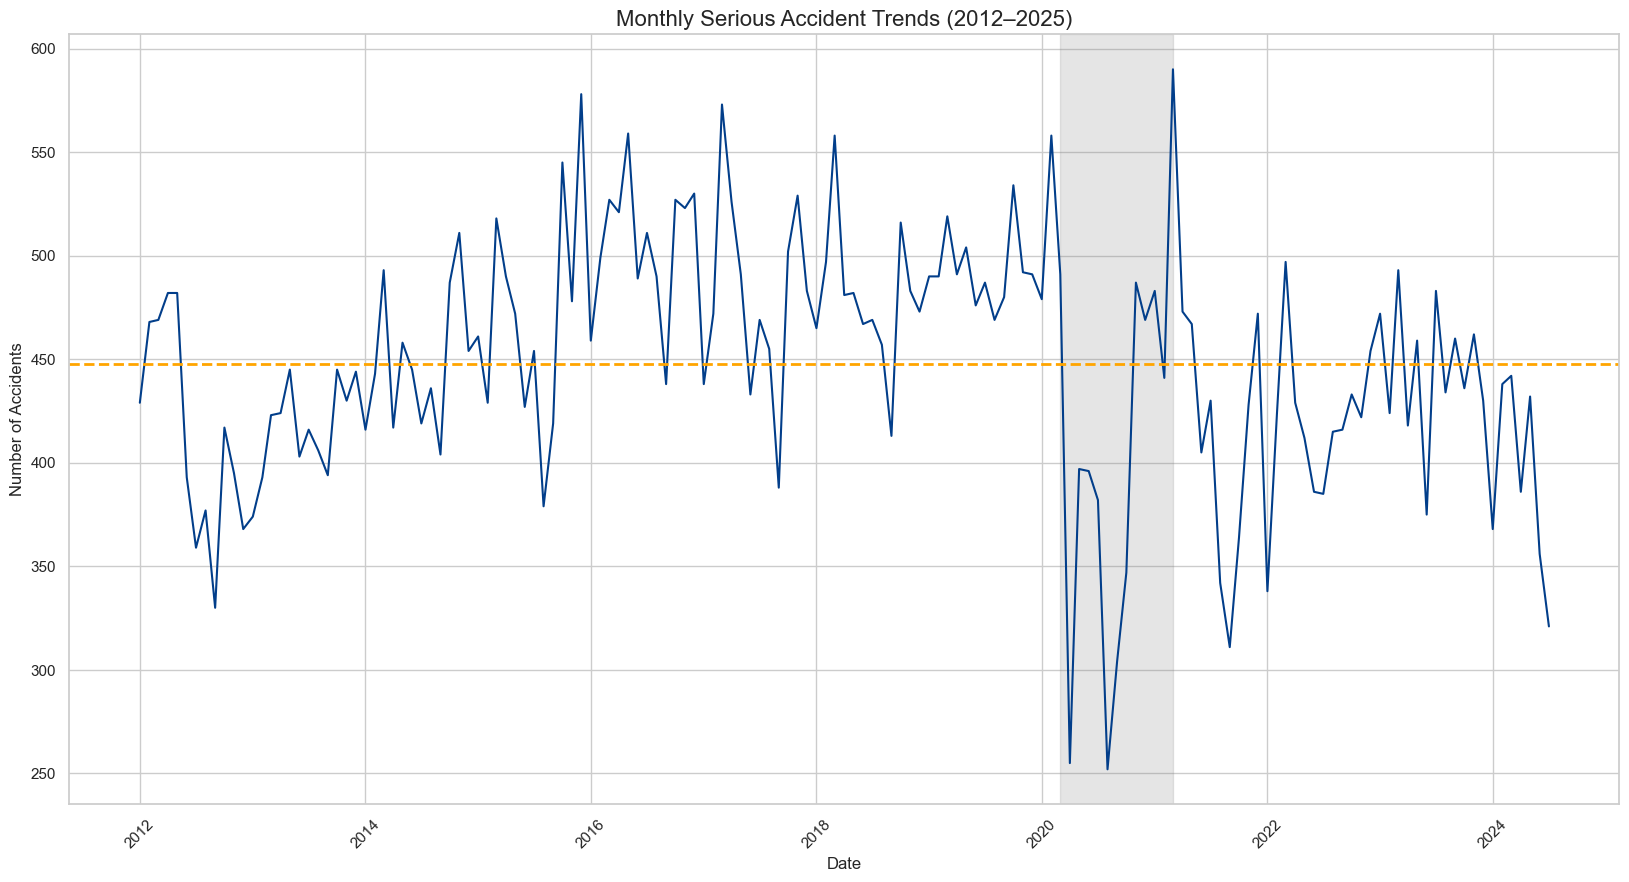

In [1170]:
plt.figure(figsize=(20,10))
sns.lineplot(data=monthly_trend, x='YEAR_MONTH', y='num_accidents')
avg_serious_accidents_all_years = serious_accidents.groupby([serious_accidents['ACCIDENT_DATE'].dt.year, serious_accidents['ACCIDENT_DATE'].dt.month])['ACCIDENT_NO'].count().mean()
plt.axhline(avg_serious_accidents_all_years, color='orange', linestyle='dashed', linewidth=2)
plt.title("Monthly Serious Accident Trends (2012–2025)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.axvspan(pd.to_datetime('2020-03-01'), pd.to_datetime('2021-03-01'), color='gray', alpha=0.2, label='COVID Period')

plt.show()

Stable baseline with seasonal variability:
From 2012 to 2019, accident numbers hover between 1100 and 1400, suggesting relatively consistent reporting and road usage patterns.

Sharp drop in 2020–2021:
There's a significant drop around early 2020, aligning with COVID-19 lockdowns. This is a well-known global effect: fewer vehicles on roads led to fewer accidents.

Post-pandemic recovery:
From 2022 onward, the numbers gradually return to pre-pandemic levels but still show higher fluctuations.

General average (orange dashed line):
The average is around 1190–1200. Useful, but might hide trends.

In [1172]:
serious_accidents_with_node_df = serious_accidents.merge(node, how='inner')

In [1173]:
serious_accidents_with_node_df

,ACCIDENT_NO,ACCIDENT_DATE,ACCIDENT_TIME,ACCIDENT_TYPE_DESC,DAY_WEEK_DESC,LIGHT_CONDITION,NO_OF_VEHICLES,NO_PERSONS_KILLED,NO_PERSONS_INJ_2,NO_PERSONS_INJ_3,...,SEVERITY,SPEED_ZONE,RMA,SEASON,YEAR_MONTH,LGA_NAME,DEG_URBAN_NAME,LATITUDE,LONGITUDE,POSTCODE_CRASH
0,T20120000012,2012-01-01,1900-01-01 02:00:00,Collision with vehicle,Sunday,3,2,0,1,0,...,2,80,NaN,Summer,2012-01,MONASH,MELB_URBAN,-37.903541,145.161404,3170
1,T20120000013,2012-01-01,1900-01-01 03:35:00,Collision with vehicle,Sunday,3,2,0,1,0,...,2,60,Arterial Other,Summer,2012-01,KINGSTON,MELB_URBAN,-37.935940,145.098848,3169
2,T20120000028,2012-01-01,1900-01-01 04:00:00,Collision with a fixed object,Sunday,5,1,0,1,0,...,2,100,NaN,Summer,2012-01,MURRINDINDI,RURAL_VICTORIA,-37.018449,145.643172,3719
3,T20120000043,2012-01-01,1900-01-01 00:45:00,Collision with vehicle,Sunday,5,2,0,2,0,...,2,80,Arterial Highway,Summer,2012-01,CASEY,MELB_URBAN,-38.121470,145.288360,3977
4,T20120000044,2012-01-01,1900-01-01 16:25:00,Collision with vehicle,Sunday,1,2,0,1,0,...,2,60,Arterial Other,Summer,2012-01,YARRA RANGES,MELB_URBAN,-37.934572,145.356418,3160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68681,T20240019357,2024-07-31,1900-01-01 19:58:00,Collision with vehicle,Wednesday,3,2,0,1,0,...,2,50,Local Road,Winter,2024-07,MONASH,MELB_URBAN,-37.880192,145.163805,3150
68682,T20240019358,2024-07-31,1900-01-01 19:02:00,Collision with vehicle,Wednesday,3,2,0,1,0,...,2,40,NaN,Winter,2024-07,DAREBIN,MELB_URBAN,-37.763260,144.999818,3071
68683,T20240019359,2024-07-31,1900-01-01 16:10:00,Collision with a fixed object,Wednesday,1,1,0,2,1,...,2,100,Local Road,Winter,2024-07,GEELONG,RURAL_VICTORIA,-38.028024,144.339687,3213
68684,T20240019274,2024-07-31,1900-01-01 06:50:00,Collision with vehicle,Wednesday,2,2,0,1,0,...,2,50,Local Road,Winter,2024-07,MONASH,MELB_URBAN,-37.930313,145.199360,3170


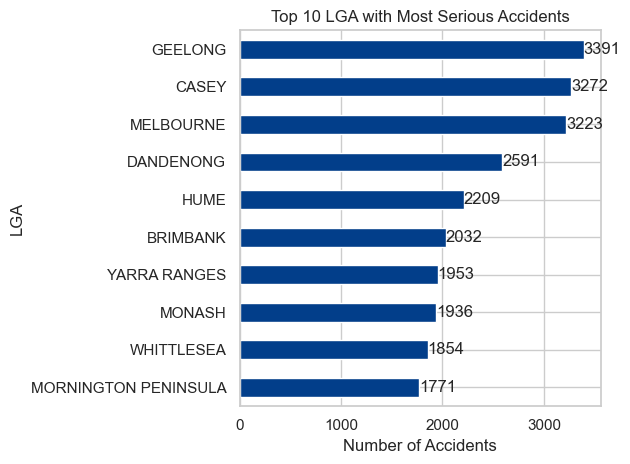

In [1174]:
top_10_LGA_most_serious_accidents = serious_accidents_with_node_df['LGA_NAME'].value_counts(ascending=True).tail(10)
ax = top_10_LGA_most_serious_accidents.plot.barh()

ax.bar_label(ax.containers[0])
plt.title('Top 10 LGA with Most Serious Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('LGA')
plt.tight_layout()

In [1175]:
top_10_LGA_most_serious_accidents_df = serious_accidents_with_node_df[serious_accidents_with_node_df['LGA_NAME'].isin(top_10_LGA_most_serious_accidents.reset_index().LGA_NAME.unique())]

In [1176]:
top_10_LGA_most_serious_accidents_df

,ACCIDENT_NO,ACCIDENT_DATE,ACCIDENT_TIME,ACCIDENT_TYPE_DESC,DAY_WEEK_DESC,LIGHT_CONDITION,NO_OF_VEHICLES,NO_PERSONS_KILLED,NO_PERSONS_INJ_2,NO_PERSONS_INJ_3,...,SEVERITY,SPEED_ZONE,RMA,SEASON,YEAR_MONTH,LGA_NAME,DEG_URBAN_NAME,LATITUDE,LONGITUDE,POSTCODE_CRASH
0,T20120000012,2012-01-01,1900-01-01 02:00:00,Collision with vehicle,Sunday,3,2,0,1,0,...,2,80,NaN,Summer,2012-01,MONASH,MELB_URBAN,-37.903541,145.161404,3170
3,T20120000043,2012-01-01,1900-01-01 00:45:00,Collision with vehicle,Sunday,5,2,0,2,0,...,2,80,Arterial Highway,Summer,2012-01,CASEY,MELB_URBAN,-38.121470,145.288360,3977
4,T20120000044,2012-01-01,1900-01-01 16:25:00,Collision with vehicle,Sunday,1,2,0,1,0,...,2,60,Arterial Other,Summer,2012-01,YARRA RANGES,MELB_URBAN,-37.934572,145.356418,3160
9,T20120000059,2012-01-01,1900-01-01 18:05:00,Collision with a fixed object,Sunday,1,1,0,2,0,...,2,100,Arterial Highway,Summer,2012-01,CASEY,MELB_URBAN,-38.139211,145.303999,3977
19,T20120000079,2012-01-02,1900-01-01 10:20:00,No collision and no object struck,Monday,1,1,0,1,0,...,2,100,Local Road,Summer,2012-01,MORNINGTON PENINSULA,RURAL_VICTORIA,-38.431180,144.972270,3929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68672,T20240019630,2024-07-30,1900-01-01 11:10:00,Collision with vehicle,Tuesday,1,2,0,1,0,...,2,100,Freeway,Winter,2024-07,MONASH,MELB_URBAN,-37.911654,145.164757,3150
68679,T20240019272,2024-07-31,1900-01-01 06:37:00,Collision with a fixed object,Wednesday,3,1,0,1,0,...,2,70,Arterial Highway,Winter,2024-07,GEELONG,LARGE_PROVINCIAL_CITIES,-38.076254,144.367714,3214
68681,T20240019357,2024-07-31,1900-01-01 19:58:00,Collision with vehicle,Wednesday,3,2,0,1,0,...,2,50,Local Road,Winter,2024-07,MONASH,MELB_URBAN,-37.880192,145.163805,3150
68683,T20240019359,2024-07-31,1900-01-01 16:10:00,Collision with a fixed object,Wednesday,1,1,0,2,1,...,2,100,Local Road,Winter,2024-07,GEELONG,RURAL_VICTORIA,-38.028024,144.339687,3213


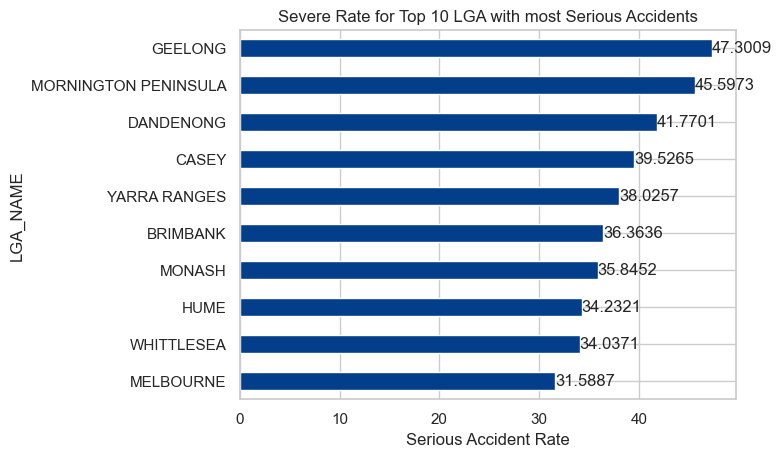

In [1177]:
ax = ((top_10_LGA_most_serious_accidents_df['LGA_NAME'].value_counts() / node['LGA_NAME'].value_counts())* 100).dropna().sort_values(ascending=True).tail(10).plot.barh()

ax.bar_label(ax.containers[0])
plt.title('Severe Rate for Top 10 LGA with most Serious Accidents')
plt.xlabel('Serious Accident Rate')
plt.show()

In [1178]:
geelong_data = top_10_LGA_most_serious_accidents_df[top_10_LGA_most_serious_accidents_df['LGA_NAME'] == 'GEELONG']

melbourne_data = top_10_LGA_most_serious_accidents_df[top_10_LGA_most_serious_accidents_df['LGA_NAME'] == 'MELBOURNE']

Geelong_Melbourne_data = top_10_LGA_most_serious_accidents_df[top_10_LGA_most_serious_accidents_df['LGA_NAME'].isin(['GEELONG','MELBOURNE'])]

In [1179]:
Geelong_Melbourne_data

,ACCIDENT_NO,ACCIDENT_DATE,ACCIDENT_TIME,ACCIDENT_TYPE_DESC,DAY_WEEK_DESC,LIGHT_CONDITION,NO_OF_VEHICLES,NO_PERSONS_KILLED,NO_PERSONS_INJ_2,NO_PERSONS_INJ_3,...,SEVERITY,SPEED_ZONE,RMA,SEASON,YEAR_MONTH,LGA_NAME,DEG_URBAN_NAME,LATITUDE,LONGITUDE,POSTCODE_CRASH
54,T20120000296,2012-01-05,1900-01-01 15:30:00,Struck Pedestrian,Thursday,1,1,0,1,0,...,2,999,NaN,Summer,2012-01,MELBOURNE,MELB_URBAN,-37.807890,144.957949,3000
69,T20120000338,2012-01-06,1900-01-01 04:36:00,Collision with a fixed object,Friday,3,1,0,1,1,...,2,60,Freeway,Summer,2012-01,MELBOURNE,MELB_URBAN,-37.824477,144.983053,3004
75,T20120000388,2012-01-06,1900-01-01 17:50:00,Collision with a fixed object,Friday,1,1,0,1,0,...,2,80,Local Road,Summer,2012-01,GEELONG,RURAL_VICTORIA,-38.018156,144.355181,3212
88,T20120000485,2012-01-08,1900-01-01 04:20:00,Collision with vehicle,Sunday,3,2,0,1,2,...,2,60,Arterial Other,Summer,2012-01,MELBOURNE,MELB_URBAN,-37.810133,144.949987,3003
108,T20120000646,2012-01-10,1900-01-01 07:45:00,Struck Pedestrian,Tuesday,1,1,0,1,0,...,2,50,Arterial Other,Summer,2012-01,MELBOURNE,MELBOURNE_CBD,-37.818357,144.956629,3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68644,T20240018917,2024-07-26,1900-01-01 18:15:00,Struck Pedestrian,Friday,3,1,0,1,0,...,2,40,NaN,Winter,2024-07,GEELONG,LARGE_PROVINCIAL_CITIES,-38.173322,144.344573,3216
68654,T20240018921,2024-07-27,1900-01-01 00:13:00,Vehicle overturned (no collision),Saturday,3,1,0,1,0,...,2,40,Arterial Other,Winter,2024-07,MELBOURNE,MELB_URBAN,-37.805966,144.939201,3003
68664,T20240019108,2024-07-29,1900-01-01 10:30:00,Collision with vehicle,Monday,1,2,0,1,0,...,2,60,Arterial Other,Winter,2024-07,MELBOURNE,MELB_URBAN,-37.792260,144.968390,3054
68679,T20240019272,2024-07-31,1900-01-01 06:37:00,Collision with a fixed object,Wednesday,3,1,0,1,0,...,2,70,Arterial Highway,Winter,2024-07,GEELONG,LARGE_PROVINCIAL_CITIES,-38.076254,144.367714,3214


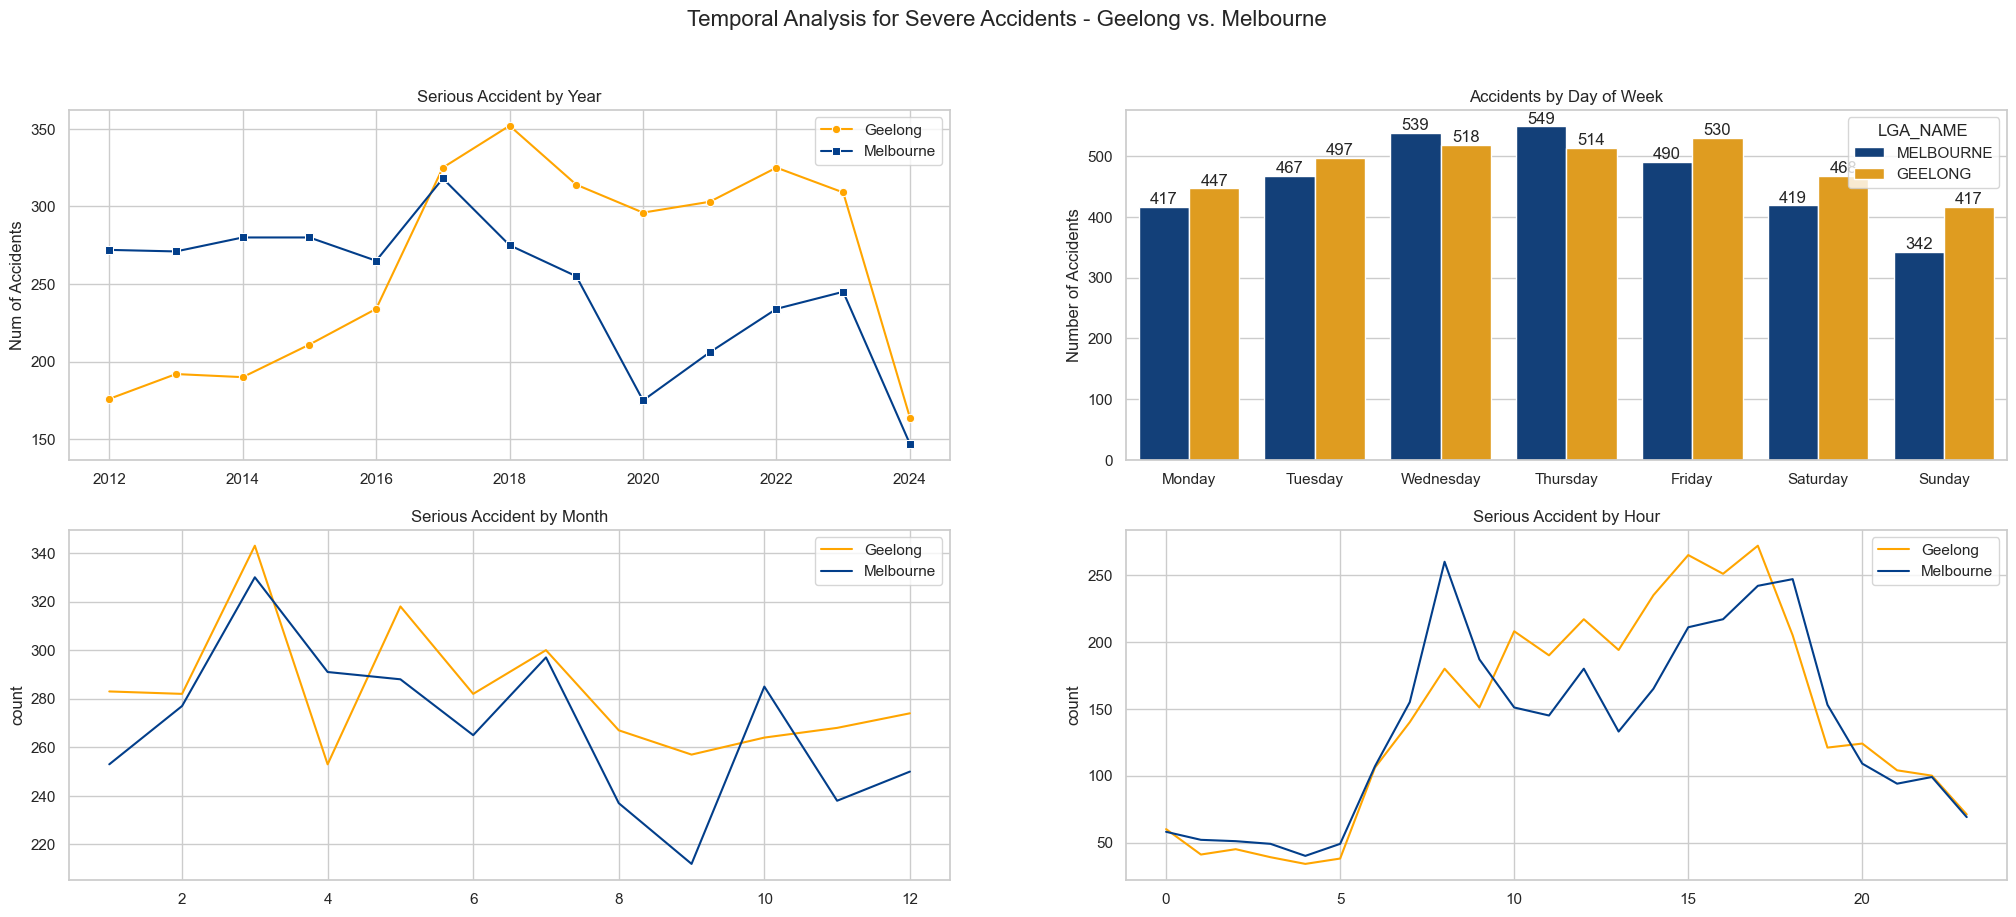

In [1180]:
plt.figure(figsize=(25, 10))
plt.suptitle('Temporal Analysis for Severe Accidents - Geelong vs. Melbourne', fontsize=16)

plt.subplot(2,2,1)
sns.lineplot(data=geelong_data['ACCIDENT_DATE'].dt.year.value_counts().reset_index(), x='ACCIDENT_DATE', y='count', color='Orange', marker='o', label='Geelong')

sns.lineplot(data=melbourne_data['ACCIDENT_DATE'].dt.year.value_counts().reset_index(), x='ACCIDENT_DATE', y='count', marker='s', label='Melbourne')
# plt.axvline(x=2017, color='grey', label='Year 2017', linestyle='--')

plt.title('Serious Accident by Year')
plt.xlabel("") 
plt.ylabel('Num of Accidents')


plt.subplot(2,2,2)
ax = sns.countplot(data=Geelong_Melbourne_data, x="DAY_WEEK_DESC", order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], hue='LGA_NAME', palette={'MELBOURNE': '#023E8A', 'GEELONG': 'orange'})
plt.xlabel("")
plt.ylabel("Number of Accidents")
plt.title("Accidents by Day of Week")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.subplot(2,2,3)

sns.lineplot(data=geelong_data['ACCIDENT_DATE'].dt.month.value_counts().reset_index(), x='ACCIDENT_DATE', y='count', color='orange', label='Geelong')

sns.lineplot(data=melbourne_data['ACCIDENT_DATE'].dt.month.value_counts().reset_index(), x='ACCIDENT_DATE', y='count', label='Melbourne')

plt.title('Serious Accident by Month')
plt.xlabel("") 


plt.subplot(2,2,4)

sns.lineplot(data=geelong_data['ACCIDENT_TIME'].dt.hour.value_counts().reset_index(), x='ACCIDENT_TIME', y='count', color='orange', label='Geelong')

sns.lineplot(data=melbourne_data['ACCIDENT_TIME'].dt.hour.value_counts().reset_index(), x='ACCIDENT_TIME', y='count', label='Melbourne')

plt.title('Serious Accident by Hour')
plt.xlabel("") 


plt.show()

In [1185]:
Geelong_Melbourne_data = Geelong_Melbourne_data.merge(vehicles, how='inner')

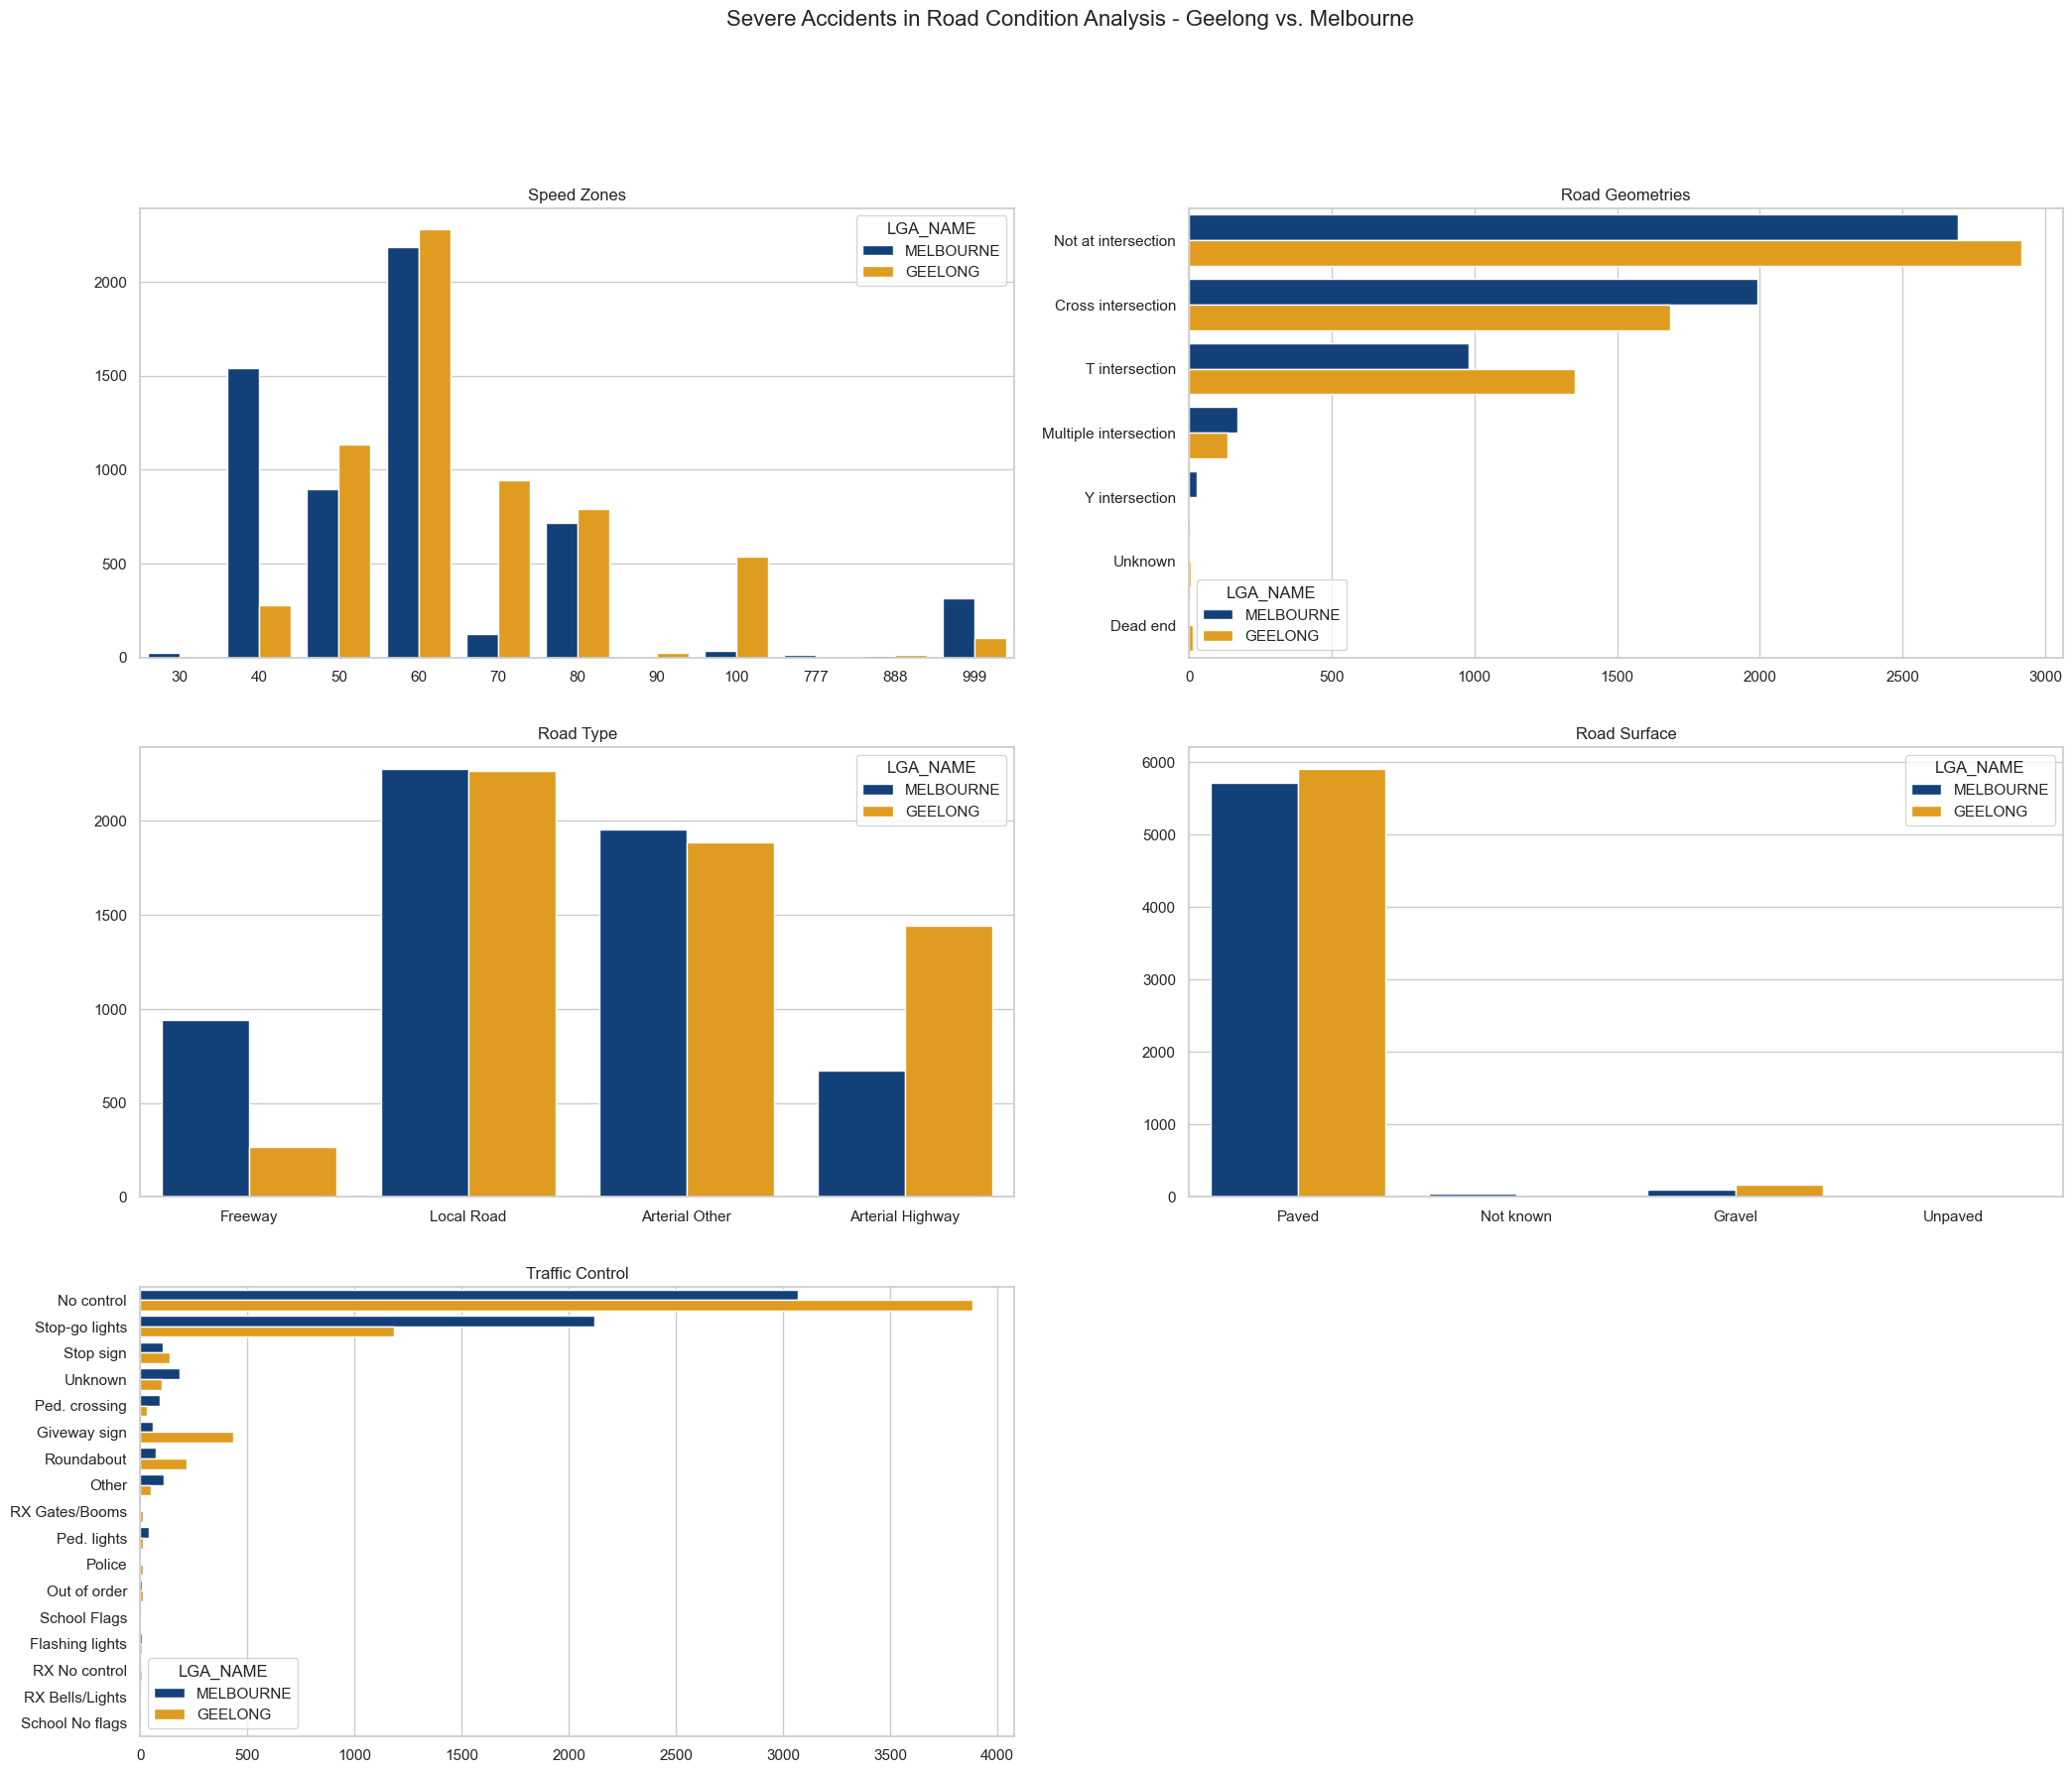

In [ ]:
plt.figure(figsize=(25, 20))
plt.suptitle('Severe Accidents in Road Condition Analysis - Geelong vs. Melbourne', fontsize=16)

plt.subplot(3,2,1)
ax = sns.countplot(data=Geelong_Melbourne_data, x='SPEED_ZONE', hue='LGA_NAME', palette={'MELBOURNE': '#023E8A', 'GEELONG': 'orange'})
plt.title('Speed Zones')
plt.xlabel('')
plt.ylabel('')


plt.subplot(3,2,2)
ax = sns.countplot(data=Geelong_Melbourne_data, y='ROAD_GEOMETRY_DESC', hue='LGA_NAME', palette={'MELBOURNE': '#023E8A', 'GEELONG': 'orange'})
plt.title('Road Geometries')
plt.xlabel('')
plt.ylabel('')
# plt.tick_params(rotation=45)

plt.subplot(3,2,3)
ax = sns.countplot(data=Geelong_Melbourne_data, x='RMA', hue='LGA_NAME', palette={'MELBOURNE': '#023E8A', 'GEELONG': 'orange'})
plt.title('Road Type')
plt.xlabel('')
plt.ylabel('')

plt.subplot(3,2,4)
ax = sns.countplot(data=Geelong_Melbourne_data, x='ROAD_SURFACE_TYPE_DESC', hue='LGA_NAME', palette={'MELBOURNE': '#023E8A', 'GEELONG': 'orange'})
plt.title('Road Surface')
plt.xlabel('')
plt.ylabel('')

plt.subplot(3,2,5)
ax = sns.countplot(data=Geelong_Melbourne_data, y='TRAFFIC_CONTROL_DESC', hue='LGA_NAME', palette={'MELBOURNE': '#023E8A', 'GEELONG': 'orange'})
plt.title('Traffic Control')
plt.xlabel('')
plt.ylabel('')

plt.show()

In [1184]:
Geelong_Melbourne_data

,ACCIDENT_NO,ACCIDENT_DATE,ACCIDENT_TIME,ACCIDENT_TYPE_DESC,DAY_WEEK_DESC,LIGHT_CONDITION,NO_OF_VEHICLES,NO_PERSONS_KILLED,NO_PERSONS_INJ_2,NO_PERSONS_INJ_3,...,SEVERITY,SPEED_ZONE,RMA,SEASON,YEAR_MONTH,LGA_NAME,DEG_URBAN_NAME,LATITUDE,LONGITUDE,POSTCODE_CRASH
54,T20120000296,2012-01-05,1900-01-01 15:30:00,Struck Pedestrian,Thursday,1,1,0,1,0,...,2,999,NaN,Summer,2012-01,MELBOURNE,MELB_URBAN,-37.807890,144.957949,3000
69,T20120000338,2012-01-06,1900-01-01 04:36:00,Collision with a fixed object,Friday,3,1,0,1,1,...,2,60,Freeway,Summer,2012-01,MELBOURNE,MELB_URBAN,-37.824477,144.983053,3004
75,T20120000388,2012-01-06,1900-01-01 17:50:00,Collision with a fixed object,Friday,1,1,0,1,0,...,2,80,Local Road,Summer,2012-01,GEELONG,RURAL_VICTORIA,-38.018156,144.355181,3212
88,T20120000485,2012-01-08,1900-01-01 04:20:00,Collision with vehicle,Sunday,3,2,0,1,2,...,2,60,Arterial Other,Summer,2012-01,MELBOURNE,MELB_URBAN,-37.810133,144.949987,3003
108,T20120000646,2012-01-10,1900-01-01 07:45:00,Struck Pedestrian,Tuesday,1,1,0,1,0,...,2,50,Arterial Other,Summer,2012-01,MELBOURNE,MELBOURNE_CBD,-37.818357,144.956629,3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68644,T20240018917,2024-07-26,1900-01-01 18:15:00,Struck Pedestrian,Friday,3,1,0,1,0,...,2,40,NaN,Winter,2024-07,GEELONG,LARGE_PROVINCIAL_CITIES,-38.173322,144.344573,3216
68654,T20240018921,2024-07-27,1900-01-01 00:13:00,Vehicle overturned (no collision),Saturday,3,1,0,1,0,...,2,40,Arterial Other,Winter,2024-07,MELBOURNE,MELB_URBAN,-37.805966,144.939201,3003
68664,T20240019108,2024-07-29,1900-01-01 10:30:00,Collision with vehicle,Monday,1,2,0,1,0,...,2,60,Arterial Other,Winter,2024-07,MELBOURNE,MELB_URBAN,-37.792260,144.968390,3054
68679,T20240019272,2024-07-31,1900-01-01 06:37:00,Collision with a fixed object,Wednesday,3,1,0,1,0,...,2,70,Arterial Highway,Winter,2024-07,GEELONG,LARGE_PROVINCIAL_CITIES,-38.076254,144.367714,3214


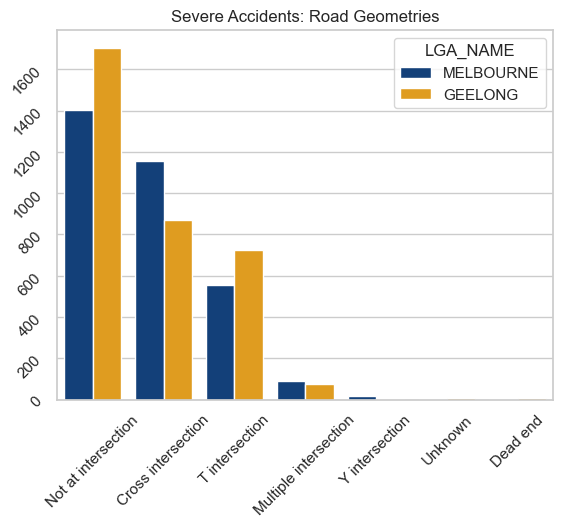

In [1131]:
ax = sns.countplot(data=Geelong_Melbourne_data, x='ROAD_GEOMETRY_DESC', hue='LGA_NAME', palette={'MELBOURNE': '#023E8A', 'GEELONG': 'orange'})
plt.title('Severe Accidents: Road Geometries')
plt.xlabel('')
plt.ylabel('')
plt.tick_params(rotation=45)
plt.show()

In [1076]:
Geelong_Melbourne_data_b4_2017 = Geelong_Melbourne_data[Geelong_Melbourne_data['ACCIDENT_DATE'].dt.year < 2017]
Geelong_Melbourne_data_after_2017 = Geelong_Melbourne_data[Geelong_Melbourne_data['ACCIDENT_DATE'].dt.year >= 2017]

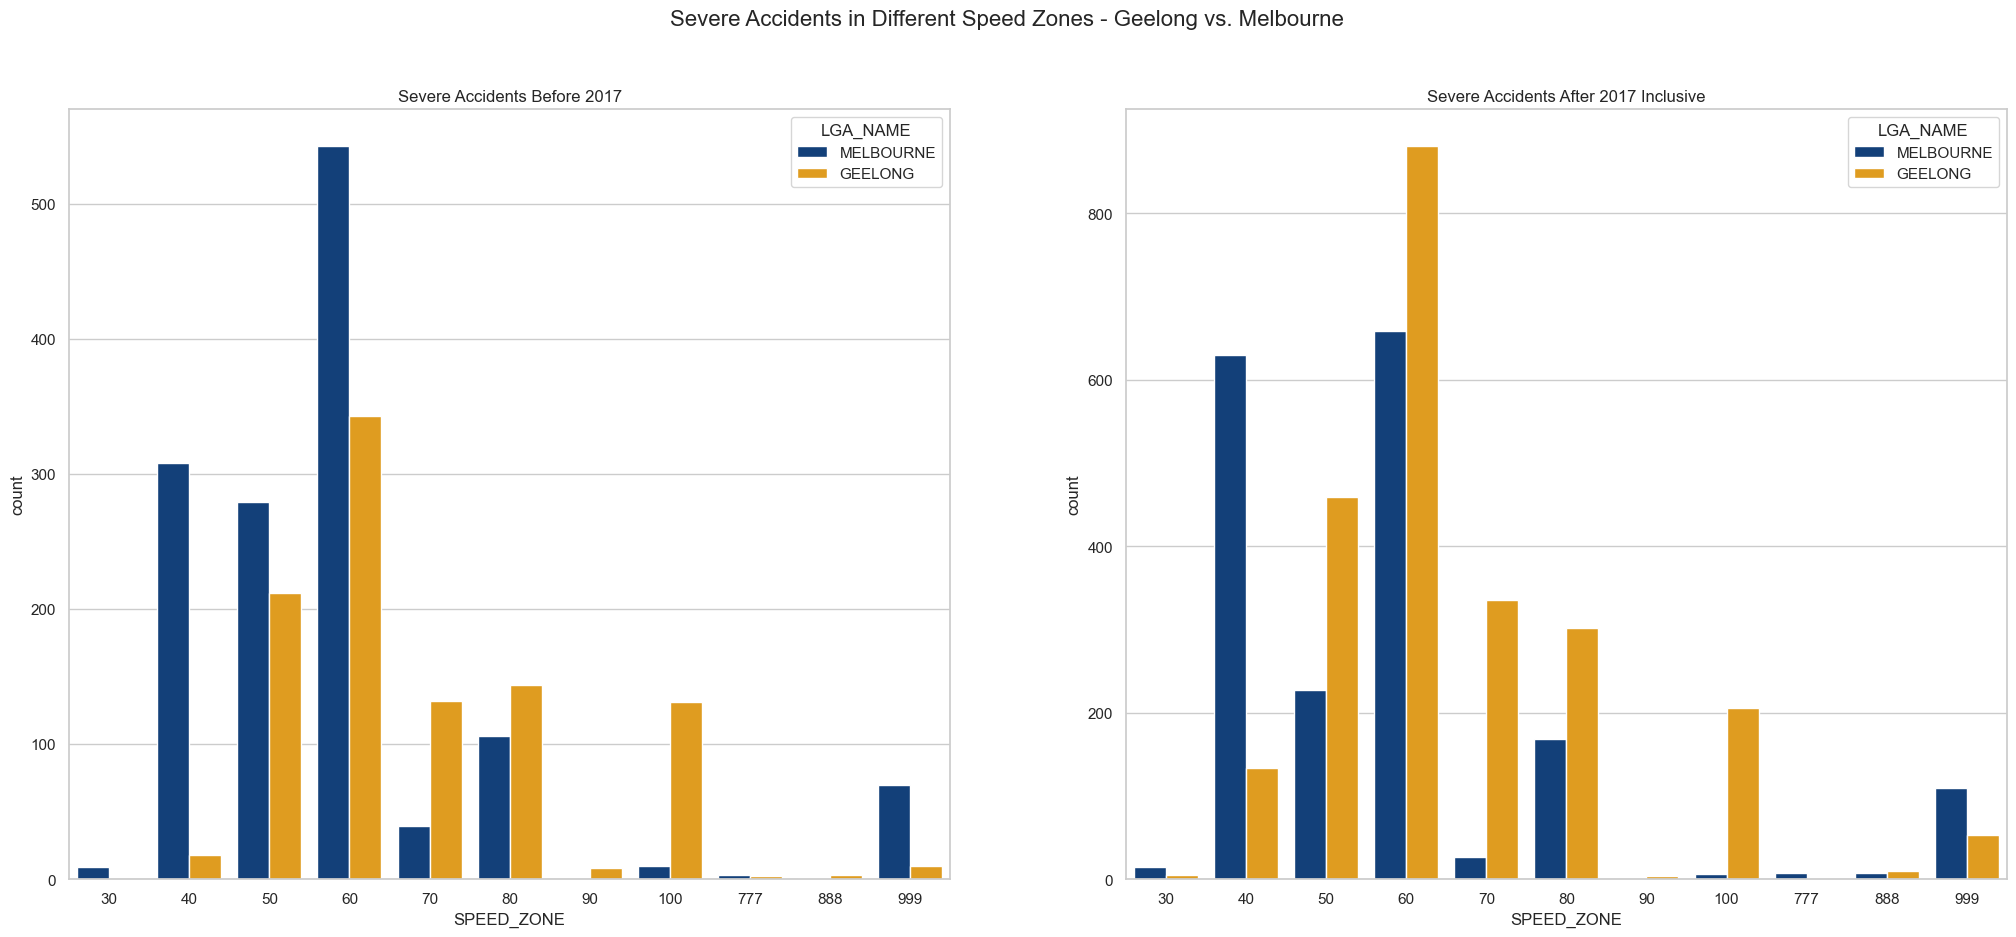

In [1074]:
plt.figure(figsize=(25, 10))
plt.suptitle('Severe Accidents in Different Speed Zones - Geelong vs. Melbourne', fontsize=16)

plt.subplot(1, 2, 1)
ax = sns.countplot(data=Geelong_Melbourne_data_b4_2017, x='SPEED_ZONE', hue='LGA_NAME', palette={'MELBOURNE': '#023E8A', 'GEELONG': 'orange'})
plt.title('Severe Accidents Before 2017')



plt.subplot(1,2,2)
ax = sns.countplot(data=Geelong_Melbourne_data_after_2017, x='SPEED_ZONE', hue='LGA_NAME', palette={'MELBOURNE': '#023E8A', 'GEELONG': 'orange'})
plt.title('Severe Accidents After 2017 Inclusive')

plt.show()

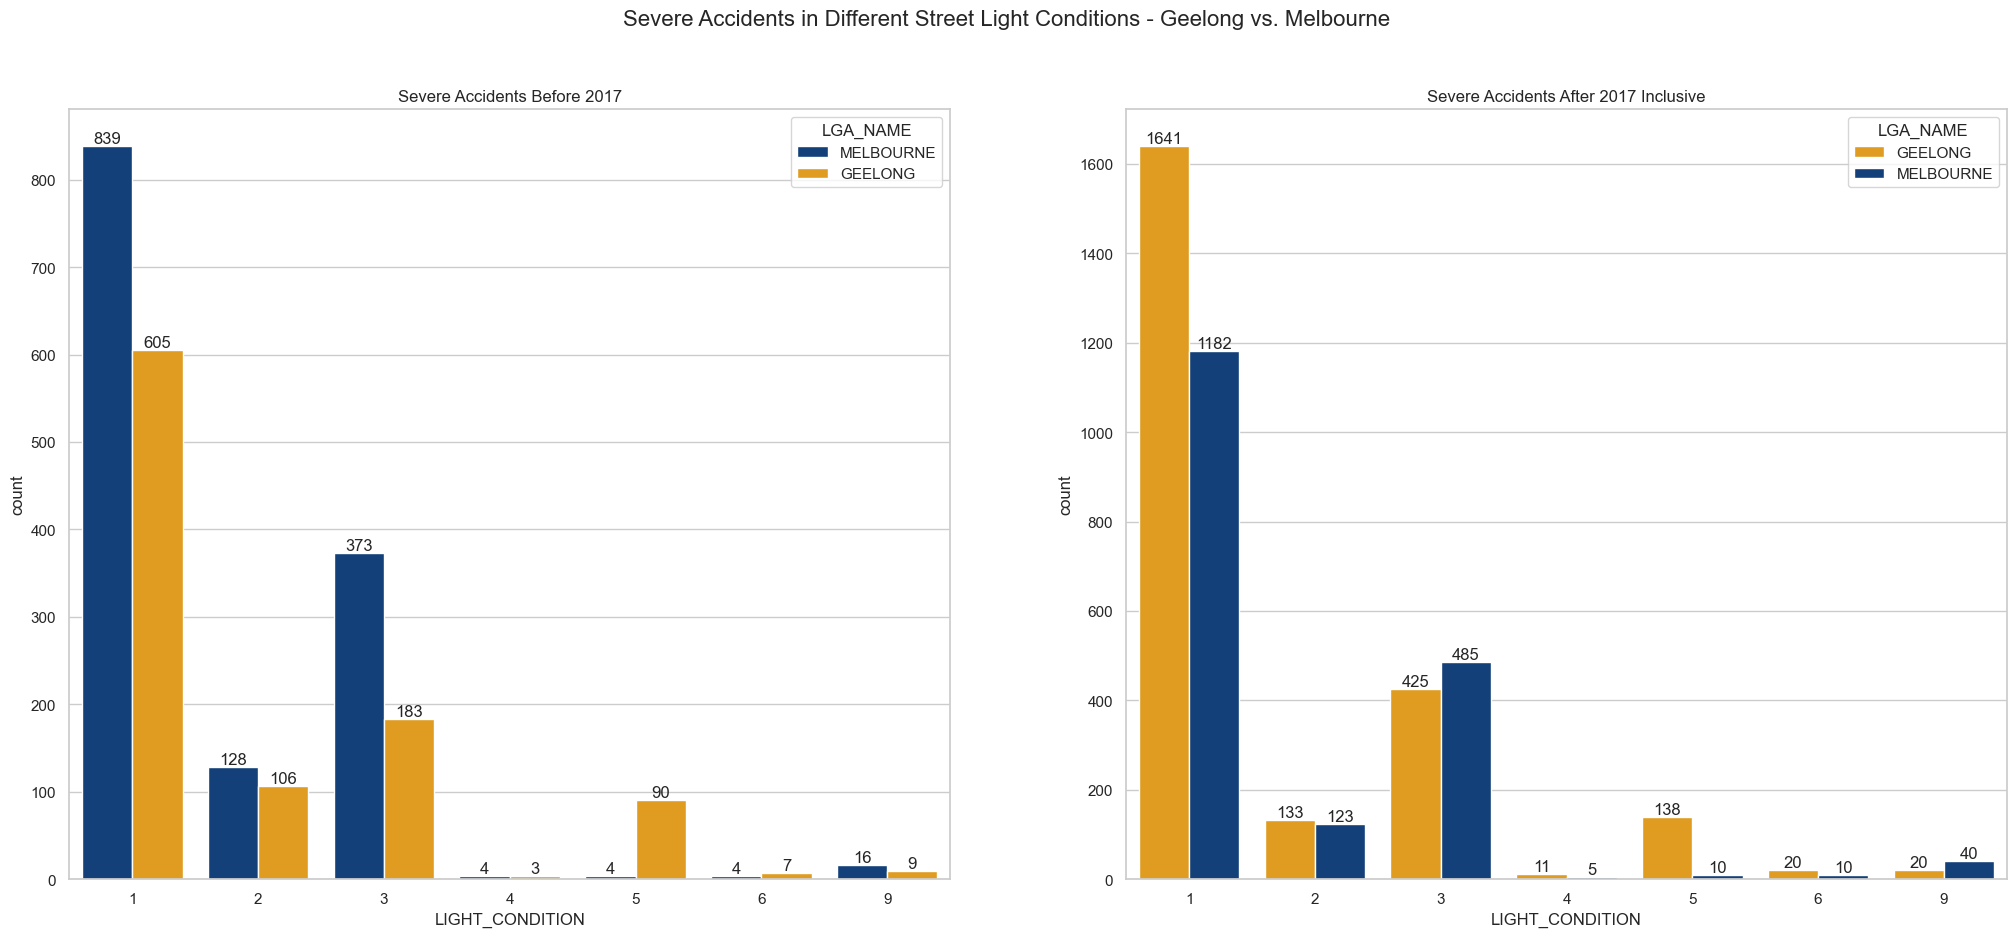

In [1075]:
Geelong_Melbourne_data_b4_2017_with_spdzn = Geelong_Melbourne_data_b4_2017[Geelong_Melbourne_data_b4_2017['SPEED_ZONE'].isin([40, 50, 60])]
Geelong_Melbourne_data_after_2017_with_spdzn = Geelong_Melbourne_data_after_2017[Geelong_Melbourne_data_after_2017['SPEED_ZONE'].isin([40, 50, 60])]

plt.figure(figsize=(25, 10))
plt.suptitle('Severe Accidents in Different Street Light Conditions - Geelong vs. Melbourne', fontsize=16)

plt.subplot(1, 2, 1)
ax = sns.countplot(data=Geelong_Melbourne_data_b4_2017, x='LIGHT_CONDITION', hue='LGA_NAME', palette={'MELBOURNE': '#023E8A', 'GEELONG': 'orange'})
plt.title('Severe Accidents Before 2017')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])


plt.subplot(1,2,2)
ax = sns.countplot(data=Geelong_Melbourne_data_after_2017, x='LIGHT_CONDITION', hue='LGA_NAME', palette={'MELBOURNE': '#023E8A', 'GEELONG': 'orange'})
plt.title('Severe Accidents After 2017 Inclusive')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

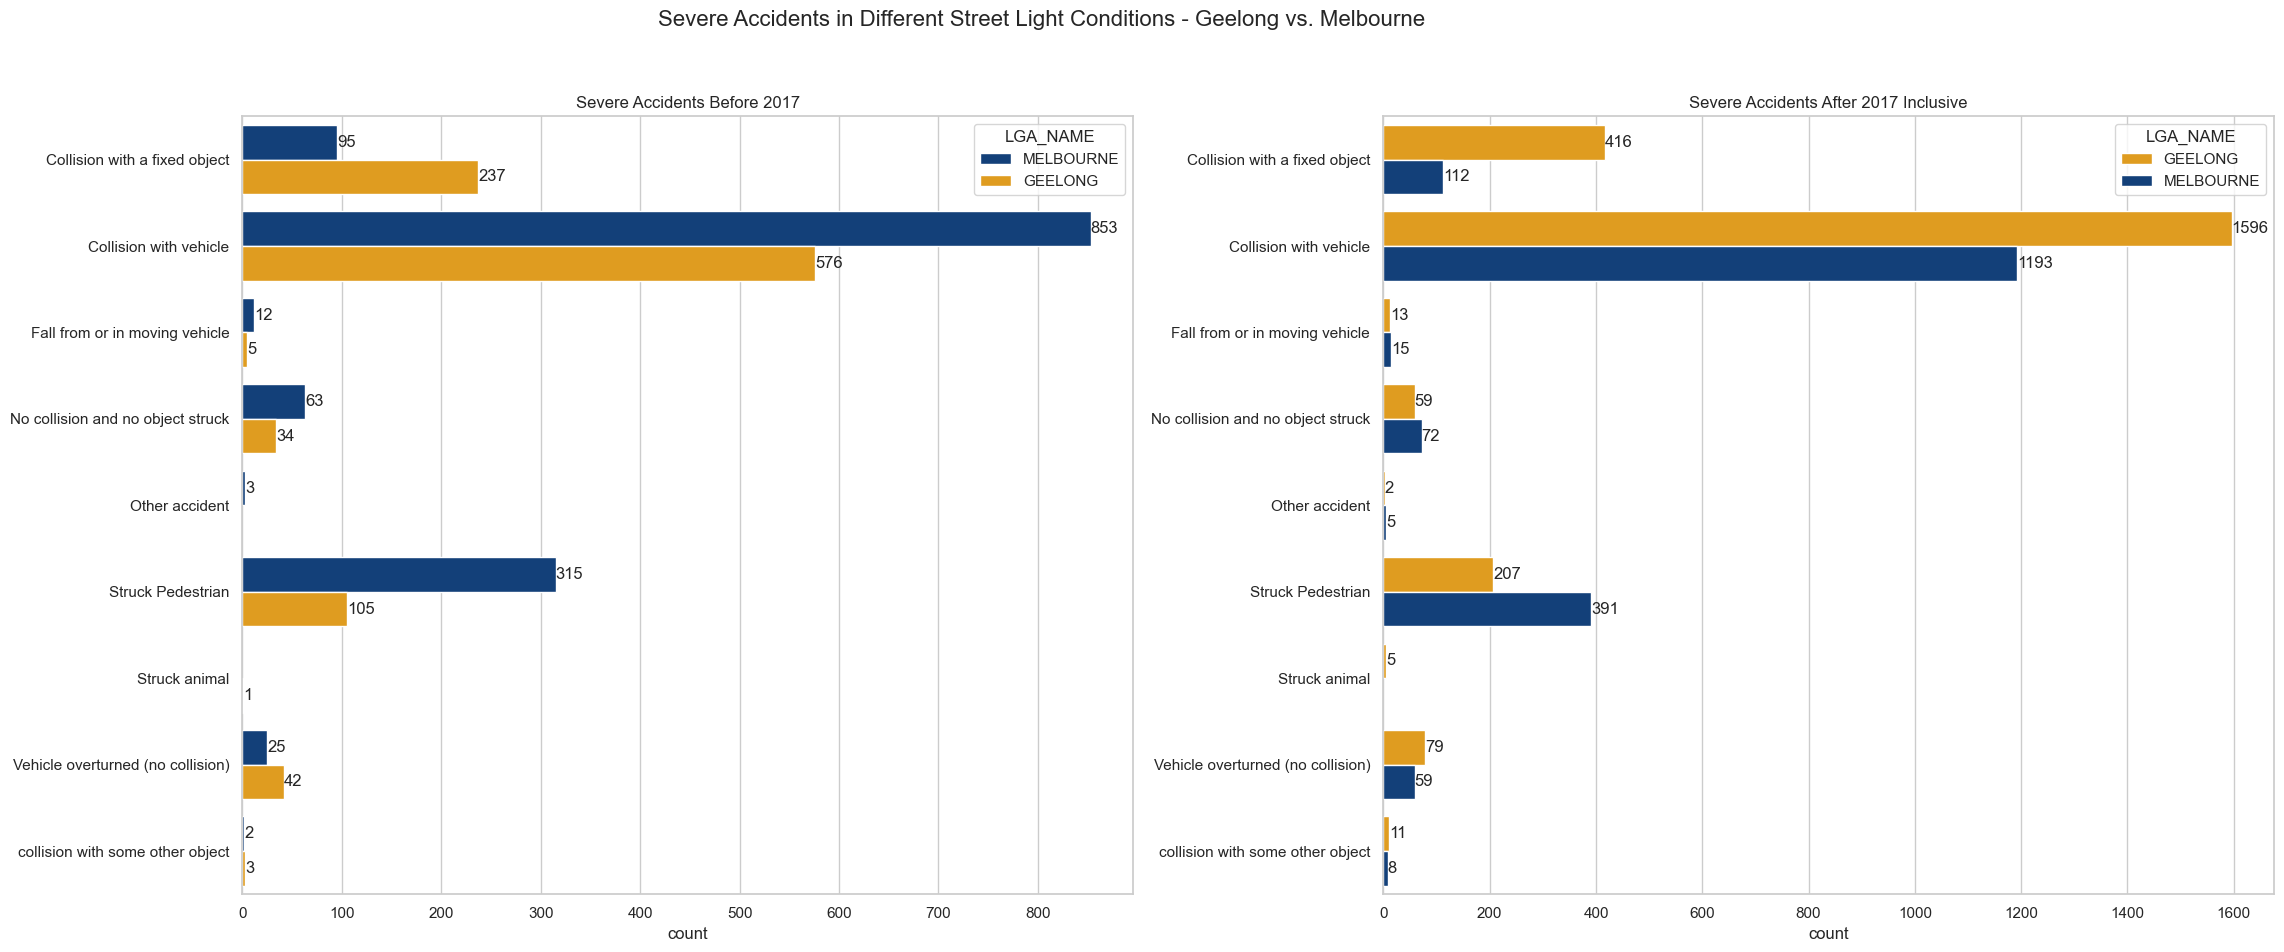

In [1097]:
# Step 1: Create a common order of accident types
common_order = sorted(
    list(set(Geelong_Melbourne_data_b4_2017['ACCIDENT_TYPE_DESC'].unique())
         | set(Geelong_Melbourne_data_after_2017['ACCIDENT_TYPE_DESC'].unique()))
)

# Step 2: Plot with fixed y-axis order
fig = plt.figure(figsize=(25, 10))
fig.suptitle('Severe Accidents in Different Street Light Conditions - Geelong vs. Melbourne', fontsize=16)

# Subplot 1
plt.subplot(1, 2, 1)
ax = sns.countplot(
    data=Geelong_Melbourne_data_b4_2017,
    y='ACCIDENT_TYPE_DESC',
    hue='LGA_NAME',
    order=common_order,
    palette={'MELBOURNE': '#023E8A', 'GEELONG': 'orange'}
)
plt.title('Severe Accidents Before 2017')
plt.ylabel('')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

# Subplot 2
plt.subplot(1, 2, 2)
ax = sns.countplot(
    data=Geelong_Melbourne_data_after_2017,
    y='ACCIDENT_TYPE_DESC',
    hue='LGA_NAME',
    order=common_order,
    palette={'MELBOURNE': '#023E8A', 'GEELONG': 'orange'}
)
plt.title('Severe Accidents After 2017 Inclusive')
plt.ylabel('')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.tight_layout(rect=[0.08, 0.03, 1, 0.95])
plt.show()


In [1072]:
Geelong_Melbourne_data[Geelong_Melbourne_data['SPEED_ZONE'] == 100]

,ACCIDENT_NO,ACCIDENT_DATE,ACCIDENT_TIME,ACCIDENT_TYPE_DESC,DAY_WEEK_DESC,LIGHT_CONDITION,NO_OF_VEHICLES,NO_PERSONS_KILLED,NO_PERSONS_INJ_2,NO_PERSONS_INJ_3,...,SPEED_ZONE,SEASON,YEAR_MONTH,AMG_X,AMG_Y,LGA_NAME,DEG_URBAN_NAME,LATITUDE,LONGITUDE,POSTCODE_CRASH
385,T20120002149,2012-01-28,1900-01-01 15:21:00,Collision with a fixed object,Saturday,1,1,1,2,1,...,100,Summer,2012-01,2446003.643,2404226.053,GEELONG,RURAL_VICTORIA,-37.861470,144.386359,3340
407,T20120002257,2012-01-30,1900-01-01 11:50:00,Collision with a fixed object,Monday,1,1,0,1,0,...,100,Summer,2012-01,2440389.950,2377128.709,GEELONG,RURAL_VICTORIA,-38.105250,144.320366,3213
546,T20120003095,2012-02-08,1900-01-01 20:35:00,Collision with a fixed object,Wednesday,2,1,0,1,0,...,100,Summer,2012-02,2446487.966,2360871.687,GEELONG,RURAL_VICTORIA,-38.252070,144.388699,3227
949,T20120005268,2012-03-03,1900-01-01 03:30:00,Collision with a fixed object,Saturday,6,1,0,1,0,...,100,Autumn,2012-03,2459281.260,2368540.315,GEELONG,RURAL_VICTORIA,-38.183642,144.535270,3222
1474,T20120008081,2012-04-05,1900-01-01 09:00:00,Vehicle overturned (no collision),Thursday,1,1,0,1,2,...,100,Autumn,2012-04,2439404.378,2373992.457,GEELONG,RURAL_VICTORIA,-38.133439,144.308870,3218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66254,T20240002382,2024-01-31,1900-01-01 09:03:00,Collision with vehicle,Wednesday,1,2,0,2,2,...,100,Summer,2024-01,2440400.359,2376491.459,GEELONG,RURAL_VICTORIA,-38.110992,144.320432,3215
67213,T20240008639,2024-04-06,1900-01-01 14:09:00,Collision with a fixed object,Saturday,1,1,0,1,0,...,100,Autumn,2024-04,2446752.560,2382720.015,GEELONG,LARGE_PROVINCIAL_CITIES,-38.055267,144.393312,3214
68001,T20240014038,2024-06-01,1900-01-01 17:16:00,Collision with vehicle,Saturday,3,3,0,1,0,...,100,Winter,2024-06,2493779.984,2408261.149,MELBOURNE,MELB_URBAN,-37.826661,144.929346,3207
68240,T20240016858,2024-06-20,1900-01-01 10:34:00,Collision with vehicle,Thursday,1,2,0,2,0,...,100,Winter,2024-06,2441314.132,2379447.910,GEELONG,LARGE_PROVINCIAL_CITIES,-38.084416,144.331088,3213


In [1069]:
Geelong_Melbourne_data_after_2017[Geelong_Melbourne_data_after_2017['SPEED_ZONE'].isin([40, 50, 60])]


,ACCIDENT_NO,ACCIDENT_DATE,ACCIDENT_TIME,ACCIDENT_TYPE_DESC,DAY_WEEK_DESC,LIGHT_CONDITION,NO_OF_VEHICLES,NO_PERSONS_KILLED,NO_PERSONS_INJ_2,NO_PERSONS_INJ_3,...,SPEED_ZONE,SEASON,YEAR_MONTH,AMG_X,AMG_Y,LGA_NAME,DEG_URBAN_NAME,LATITUDE,LONGITUDE,POSTCODE_CRASH
27494,T20170000078,2017-01-02,1900-01-01 21:00:00,Collision with vehicle,Monday,3,2,0,1,0,...,50,Summer,2017-01,2.442394e+06,2.379191e+06,GEELONG,LARGE_PROVINCIAL_CITIES,-38.086800,144.343371,3214
27500,T20170000133,2017-01-03,1900-01-01 22:30:00,Collision with vehicle,Tuesday,3,2,0,1,1,...,60,Summer,2017-01,2.443201e+06,2.369236e+06,GEELONG,LARGE_PROVINCIAL_CITIES,-38.176527,144.351804,3216
27528,T20170000251,2017-01-05,1900-01-01 14:35:00,Collision with vehicle,Thursday,1,2,0,2,0,...,40,Summer,2017-01,2.496240e+06,2.409205e+06,MELBOURNE,MELBOURNE_CBD,-37.818167,144.957289,3000
27529,T20170000255,2017-01-05,1900-01-01 19:10:00,Collision with vehicle,Thursday,1,2,0,1,2,...,50,Summer,2017-01,2.474373e+06,2.374156e+06,GEELONG,SMALL_TOWNS,-38.133591,144.707707,3223
27537,T20170001462,2017-01-06,1900-01-01 17:20:00,Collision with vehicle,Friday,1,2,0,1,0,...,60,Summer,2017-01,2.446852e+06,2.371181e+06,GEELONG,LARGE_PROVINCIAL_CITIES,-38.159220,144.393603,3219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68622,T20240018654,2024-07-24,1900-01-01 12:40:00,Collision with a fixed object,Wednesday,1,1,0,3,1,...,50,Winter,2024-07,2.442860e+06,2.378230e+06,GEELONG,LARGE_PROVINCIAL_CITIES,-38.095488,144.348612,3214
68638,T20240018815,2024-07-25,1900-01-01 20:20:00,Struck Pedestrian,Thursday,3,1,0,1,0,...,50,Winter,2024-07,2.442990e+06,2.374050e+06,GEELONG,LARGE_PROVINCIAL_CITIES,-38.133152,144.349768,3218
68644,T20240018917,2024-07-26,1900-01-01 18:15:00,Struck Pedestrian,Friday,3,1,0,1,0,...,40,Winter,2024-07,2.442565e+06,2.369588e+06,GEELONG,LARGE_PROVINCIAL_CITIES,-38.173322,144.344573,3216
68654,T20240018921,2024-07-27,1900-01-01 00:13:00,Vehicle overturned (no collision),Saturday,3,1,0,1,0,...,40,Winter,2024-07,2.494646e+06,2.410559e+06,MELBOURNE,MELB_URBAN,-37.805966,144.939201,3003


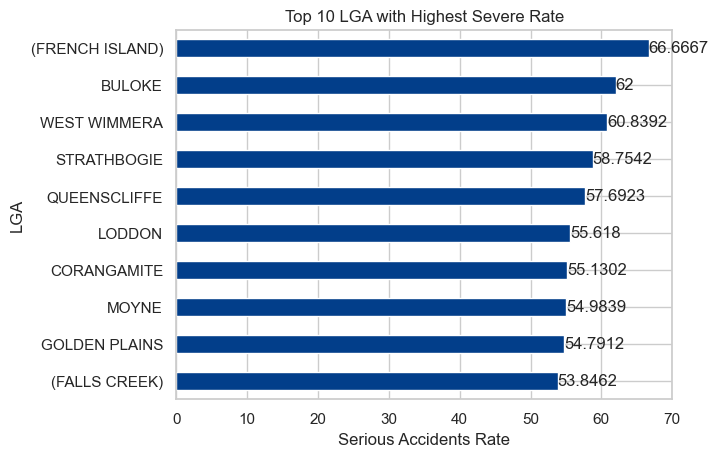

In [812]:
top_10_LGA_most_severe_rate = ((serious_accidents_with_node_df['LGA_NAME'].value_counts() / node['LGA_NAME'].value_counts() * 100).sort_values(ascending=True).dropna().tail(10))

ax = top_10_LGA_most_severe_rate.plot.barh()

ax.bar_label(ax.containers[0])
plt.title('Top 10 LGA with Highest Severe Rate')
plt.xlabel('Serious Accidents Rate')
plt.ylabel('LGA')
plt.show()

In [892]:
LGA_most_severe_rate_df = serious_accidents_with_node_df[serious_accidents_with_node_df['LGA_NAME'].isin(top_10_LGA_most_severe_rate.reset_index().LGA_NAME.unique())]

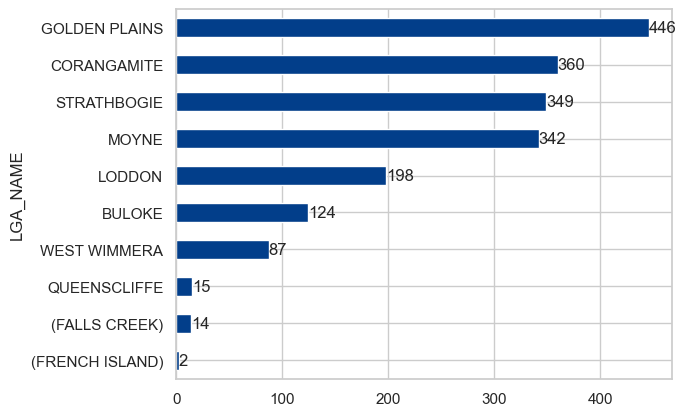

In [904]:
ax = LGA_most_severe_rate_df['LGA_NAME'].value_counts().sort_values(ascending=True).plot.barh()

ax.bar_label(ax.containers[0])
plt.show()

In [897]:
LGA_most_severe_rate_df[LGA_most_severe_rate_df.LGA_NAME == '(FRENCH ISLAND)']

,ACCIDENT_NO,ACCIDENT_DATE,ACCIDENT_TIME,ACCIDENT_TYPE_DESC,DAY_WEEK_DESC,LIGHT_CONDITION,NO_OF_VEHICLES,NO_PERSONS_KILLED,NO_PERSONS_INJ_2,NO_PERSONS_INJ_3,...,SEASON,YEAR_MONTH,AMG_X,AMG_Y,LGA_NAME,DEG_URBAN_NAME,LATITUDE,LONGITUDE,POSTCODE_CRASH,_merge
29426,T20170008131,2017-04-23,1900-01-01 16:20:00,Collision with vehicle,Sunday,1,2,1,0,0,...,Autumn,2017-04,2524822.110,2346539.938,(FRENCH ISLAND),RURAL_VICTORIA,-38.382382,145.284050,3921,both
63578,T20230017655,2023-07-28,1900-01-01 19:55:00,Collision with vehicle,Friday,5,2,1,3,0,...,Winter,2023-07,2529775.907,2345838.511,(FRENCH ISLAND),RURAL_VICTORIA,-38.388554,145.340767,3921,both


In [899]:
node[node.LGA_NAME == '(FRENCH ISLAND)']

,ACCIDENT_NO,AMG_X,AMG_Y,LGA_NAME,DEG_URBAN_NAME,LATITUDE,LONGITUDE,POSTCODE_CRASH
172720,T20200020219,2529356.316,2351072.180,(FRENCH ISLAND),RURAL_VICTORIA,-38.341425,145.335753,3921
172721,T20230017655,2529775.907,2345838.511,(FRENCH ISLAND),RURAL_VICTORIA,-38.388554,145.340767,3921
172722,T20170008131,2524822.110,2346539.938,(FRENCH ISLAND),RURAL_VICTORIA,-38.382382,145.284050,3921


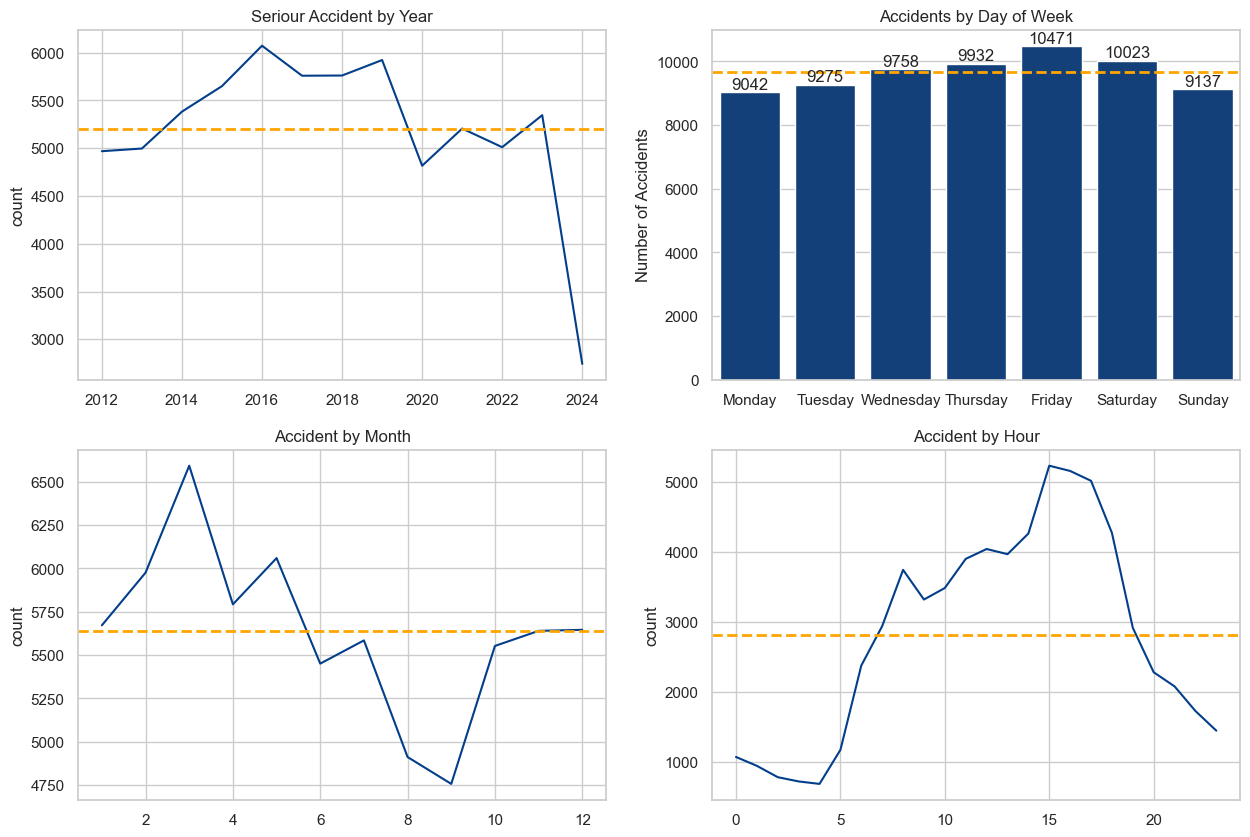

In [829]:
plt.figure(figsize=(15, 10))

plt.subplot(2,2,1)
sns.lineplot(data=serious_accidents['ACCIDENT_DATE'].dt.year.value_counts().reset_index(), x='ACCIDENT_DATE', y='count')
plt.title('Seriour Accident by Year')
plt.xlabel("") 
avg_accidents_by_year = serious_accidents["ACCIDENT_DATE"].dt.year.value_counts().mean()
plt.axhline(avg_accidents_by_year, color='orange', linestyle='dashed', linewidth=2)


plt.subplot(2,2,2)
ax = sns.countplot(data=serious_accidents, x="DAY_WEEK_DESC", order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.xlabel("")
plt.ylabel("Number of Accidents")
plt.title("Accidents by Day of Week")
ax.bar_label(ax.containers[0])
avg_accidents_by_type = serious_accidents["DAY_WEEK_DESC"].value_counts().mean()
plt.axhline(avg_accidents_by_type, color='orange', linestyle='dashed', linewidth=2)

plt.subplot(2,2,3)
sns.lineplot(data=serious_accidents['ACCIDENT_DATE'].dt.month.value_counts().reset_index(), x='ACCIDENT_DATE', y='count')
plt.title('Accident by Month')
plt.xlabel("") 
avg_accidents_by_month = serious_accidents['ACCIDENT_DATE'].dt.month.value_counts().mean()
plt.axhline(avg_accidents_by_month, color='orange', linestyle='dashed', linewidth=2)

plt.subplot(2,2,4)
sns.lineplot(data=serious_accidents['ACCIDENT_TIME'].dt.hour.value_counts().reset_index(), x='ACCIDENT_TIME', y='count')
plt.title('Accident by Hour')
plt.xlabel("") 
avg_accidents_by_hour = serious_accidents["ACCIDENT_TIME"].dt.hour.value_counts().mean()
plt.axhline(avg_accidents_by_hour, color='orange', linestyle='dashed', linewidth=2)


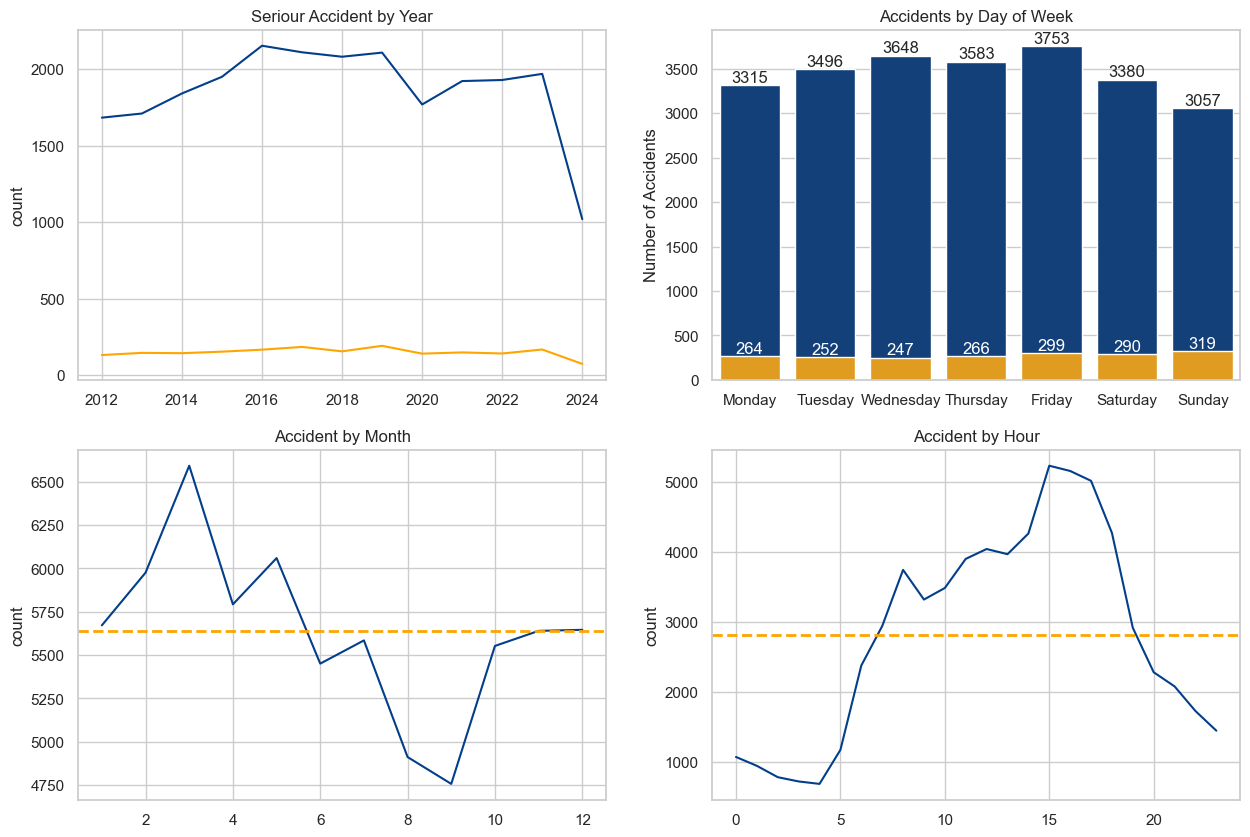

In [847]:
plt.figure(figsize=(15, 10))

plt.subplot(2,2,1)
sns.lineplot(data=LGA_most_severe_accidents_df['ACCIDENT_DATE'].dt.year.value_counts().reset_index(), x='ACCIDENT_DATE', y='count')

sns.lineplot(data=LGA_most_severe_rate_df['ACCIDENT_DATE'].dt.year.value_counts().reset_index(), x='ACCIDENT_DATE', y='count', color='Orange')


plt.title('Seriour Accident by Year')
plt.xlabel("") 


plt.subplot(2,2,2)
ax = sns.countplot(data=LGA_most_severe_accidents_df, x="DAY_WEEK_DESC", order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
ax2 = sns.countplot(data=LGA_most_severe_rate_df, x="DAY_WEEK_DESC", order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], color='orange')
plt.xlabel("")
plt.ylabel("Number of Accidents")
plt.title("Accidents by Day of Week")
ax.bar_label(ax.containers[0])
ax2.bar_label(ax2.containers[1], color='white')
# avg_accidents_by_type = serious_accidents["DAY_WEEK_DESC"].value_counts().mean()
# plt.axhline(avg_accidents_by_type, color='orange', linestyle='dashed', linewidth=2)

plt.subplot(2,2,3)
sns.lineplot(data=serious_accidents['ACCIDENT_DATE'].dt.month.value_counts().reset_index(), x='ACCIDENT_DATE', y='count')
plt.title('Accident by Month')
plt.xlabel("") 
avg_accidents_by_month = serious_accidents['ACCIDENT_DATE'].dt.month.value_counts().mean()
plt.axhline(avg_accidents_by_month, color='orange', linestyle='dashed', linewidth=2)

plt.subplot(2,2,4)
sns.lineplot(data=serious_accidents['ACCIDENT_TIME'].dt.hour.value_counts().reset_index(), x='ACCIDENT_TIME', y='count')
plt.title('Accident by Hour')
plt.xlabel("") 
avg_accidents_by_hour = serious_accidents["ACCIDENT_TIME"].dt.hour.value_counts().mean()
plt.axhline(avg_accidents_by_hour, color='orange', linestyle='dashed', linewidth=2)


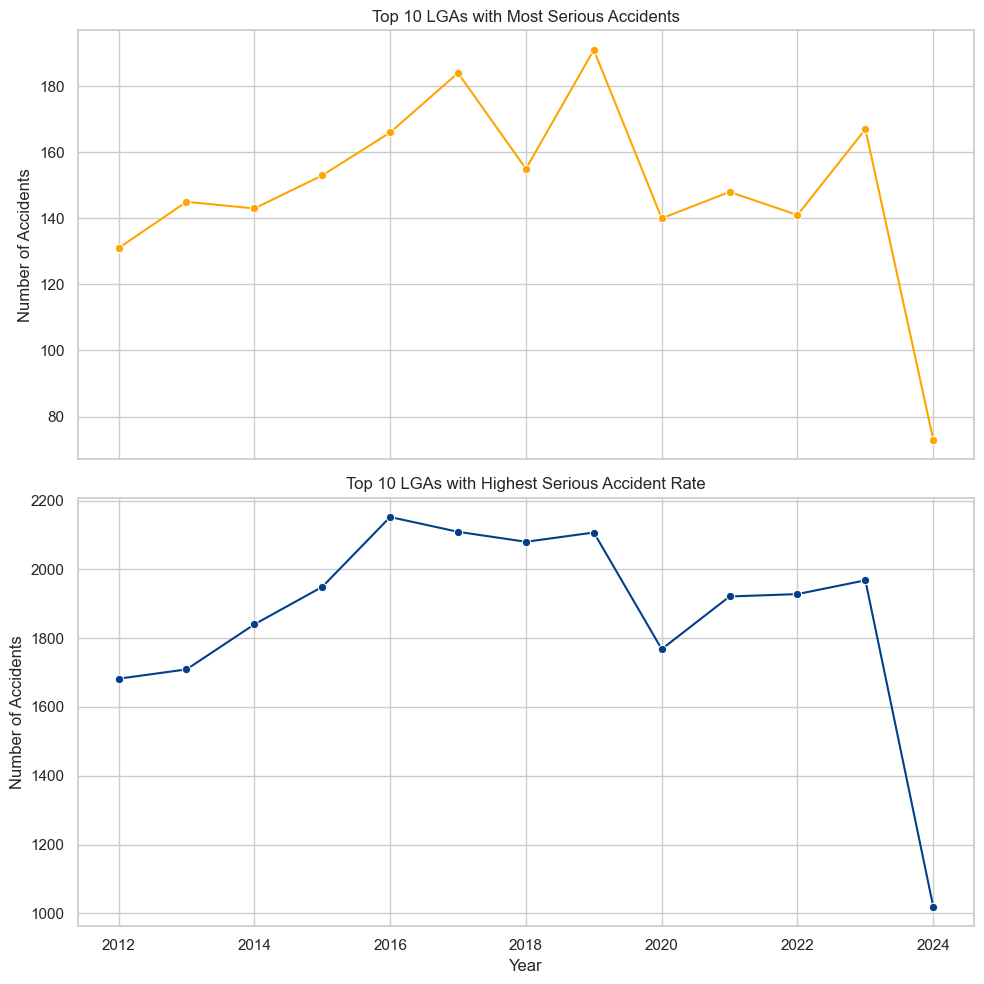

In [868]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharex=True)

sns.lineplot(data=LGA_most_severe_rate_df['ACCIDENT_DATE'].dt.year.value_counts().reset_index(), x='ACCIDENT_DATE', y='count',color='Orange', ax=axes[0], marker='o')
axes[0].set_title("Top 10 LGAs with Most Serious Accidents")
axes[0].set_ylabel("Number of Accidents")

sns.lineplot(data=LGA_most_severe_accidents_df['ACCIDENT_DATE'].dt.year.value_counts().reset_index(), x='ACCIDENT_DATE', y='count', ax=axes[1], marker='o')
axes[1].set_title("Top 10 LGAs with Highest Serious Accident Rate")
axes[1].set_ylabel("Number of Accidents")
axes[1].set_xlabel("Year")

# Style and layout
plt.tight_layout()
plt.show()


In [918]:
geelong_data = autumn_node_df[autumn_node_df['LGA_NAME'] == 'GEELONG']

geelong_data.groupby('POSTCODE_CRASH')['ACCIDENT_NO'].count().sort_values(ascending=False)

POSTCODE_CRASH
3216    139
3214    129
3220    124
3215    100
3219     74
3224     57
3212     55
3218     50
3222     43
3213     35
3217     34
3226     22
3227     17
3223     14
3225      9
3340      7
3211      5
Name: ACCIDENT_NO, dtype: int64

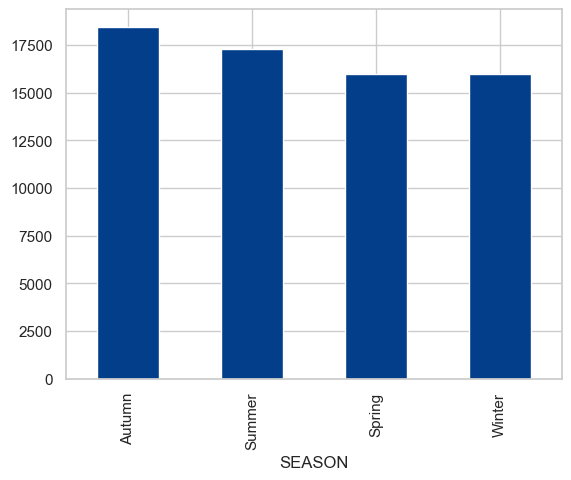

In [712]:
serious_accidents.SEASON.value_counts().plot.bar()
plt.show()

In [514]:
autumn_df = serious_accidents[serious_accidents['SEASON'] == 'Autumn']

In [515]:
autumn_node_df = autumn_df.merge(node, how='inner', indicator=True)

In [516]:
autumn_node_df

,ACCIDENT_NO,ACCIDENT_DATE,ACCIDENT_TIME,ACCIDENT_TYPE_DESC,DAY_WEEK_DESC,LIGHT_CONDITION,NO_OF_VEHICLES,NO_PERSONS_KILLED,NO_PERSONS_INJ_2,NO_PERSONS_INJ_3,...,YEAR_MONTH,YEAR_SEASON,AMG_X,AMG_Y,LGA_NAME,DEG_URBAN_NAME,LATITUDE,LONGITUDE,POSTCODE_CRASH,_merge
0,T20120005076,2012-03-01,1900-01-01 11:25:00,Collision with a fixed object,Thursday,1,3,0,1,0,...,2012-03,2012-Autumn,2505694.618,2412958.689,BOROONDARA,MELB_URBAN,-37.784339,145.064650,3104,both
1,T20120005081,2012-03-01,1900-01-01 14:35:00,Collision with a fixed object,Thursday,1,1,0,1,0,...,2012-03,2012-Autumn,2433905.112,2433736.902,MOORABOOL,RURAL_VICTORIA,-37.594794,144.251507,3342,both
2,T20120005089,2012-03-01,1900-01-01 15:50:00,Collision with vehicle,Thursday,1,3,0,2,1,...,2012-03,2012-Autumn,2396822.326,2433040.567,BALLARAT,LARGE_PROVINCIAL_CITIES,-37.597704,143.831500,3356,both
3,T20120005090,2012-03-01,1900-01-01 18:30:00,Vehicle overturned (no collision),Thursday,2,1,0,1,0,...,2012-03,2012-Autumn,2539044.097,2372427.132,CARDINIA,RURAL_VICTORIA,-38.148700,145.445410,3978,both
4,T20120005438,2012-03-01,1900-01-01 10:40:00,Collision with vehicle,Thursday,1,2,0,1,0,...,2012-03,2012-Autumn,2511991.153,2400827.881,MONASH,MELB_URBAN,-37.893577,145.136330,3149,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18706,T20240013907,2024-05-31,1900-01-01 11:40:00,Struck Pedestrian,Friday,1,1,0,1,0,...,2024-05,2024-Autumn,2502534.232,2404607.121,STONNINGTON,MELB_URBAN,-37.859601,145.028799,3144,both
18707,T20240013892,2024-05-31,1900-01-01 10:01:00,Collision with vehicle,Friday,1,2,0,1,1,...,2024-05,2024-Autumn,2365782.568,2682530.185,SWAN HILL,RURAL_VICTORIA,-35.345624,143.523831,3585,both
18708,T20240013937,2024-05-31,1900-01-01 14:40:00,Collision with vehicle,Friday,1,2,0,1,0,...,2024-05,2024-Autumn,2456510.813,2360740.029,GEELONG,SMALL_CITIES,-38.253782,144.503186,3226,both
18709,T20240014534,2024-05-31,1900-01-01 07:12:00,Struck animal,Friday,1,1,0,1,0,...,2024-05,2024-Autumn,2473086.679,2450284.319,MACEDON RANGES,RURAL_VICTORIA,-37.447638,144.695813,3431,both


In [647]:
geelong_data = autumn_node_df[autumn_node_df['LGA_NAME'] == 'GEELONG']

geelong_data.groupby('POSTCODE_CRASH')['ACCIDENT_NO'].count().sort_values(ascending=False)

POSTCODE_CRASH
3216    139
3214    129
3220    124
3215    100
3219     74
3224     57
3212     55
3218     50
3222     43
3213     35
3217     34
3226     22
3227     17
3223     14
3225      9
3340      7
3211      5
Name: ACCIDENT_NO, dtype: int64

In [1002]:
geelong_data = autumn_node_df[autumn_node_df['LGA_NAME'] == 'GEELONG']
geelong_map = folium.Map(location=[-38.1500, 144.3500], zoom_start=10, tiles='CartoDB positron') 

for _, row in geelong_data.iterrows():
    color = '#D00000' if row['SEVERITY'] == 1 else '#023E8A'  # Red = Fatal, Orange = Serious
    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=3,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.8
    ).add_to(geelong_map)

# Display map
geelong_map
